In [1]:
%%capture
import torch
def format_pytorch_version(version):
    return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)
print(f"CUDA version: {CUDA}  and TORCH version: {TORCH}")

!python -m pip install --upgrade pip
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric
! pip install tensorboardX
! pip install torchmetrics
! pip install scikit-dimension
! pip install umap-learn
%env BEZIER_NO_EXTENSION=true
! python  -m pip install --upgrade bezier --no-binary=bezier
! pip install matplotlib
! pip install networkx
! pip install pandas
! pip install tensorboard 
! pip install graphviz
! pip install imageio

# serve installare tesnorflow o no?  
! pip install tensorflow

!pip install NEMtropy
!pip uninstall -y pandas
!pip install pandas==1.3.5

In [5]:
#!ls

In [2]:
%cd /workspace

/workspace


In [3]:
! git clone https://github.com/dandarm/Graph_AE

Cloning into 'Graph_AE'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 179 (delta 84), reused 163 (delta 74), pack-reused 0
Receiving objects: 100% (179/179), 156.46 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
! git clone https://github.com/dandarm/Embednet
#import shutil
#shutil.rmtree('Embednet')

# START HERE

In [1]:
import sys
#sys.path.append('/workspace/Embednet/')
#sys.path.append('/workspace/Graph_AE/')

import torch_geometric

In [3]:
#import matplotlib.pyplot as plt
plt.plot([1,23,3,4,5,65,76])

In [2]:
%load_ext autoreload
%autoreload 2

#per la riproducibilità
#%env CUBLAS_WORKSPACE_CONFIG=":4096:8"

import os
import itertools
from pathlib import Path
import pickle
import yaml
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from IPython.display import Markdown as md
from multiprocessing import Pool
import time
from tqdm import tqdm
import networkx as nx
from networkx import stochastic_block_model
from scipy import stats
from sklearn.metrics import log_loss
import torch
import torch_geometric
from torch_geometric import nn
from torch_geometric.loader import DataLoader
device = torch.device('cuda')
from graph_generation import GenerateGraph, perturb_nx_graph
from models import GCN, view_parameters, new_parameters, modify_parameters, Inits, new_parameters_linears
from train import Trainer, Dataset
from embedding import Embedding
from config_valid import Config, TrainingMode
import experiments
from experiments import Experiments, all_seeds
from plot_funcs import (plot_dim1, plot_dimN, plot_correlation_error, plot_metrics, plot_node_emb_1D, plot_node_emb_nD, scatter_node_emb, 
                        plot_graph_emb_1D, plot_graph_emb_nD, plot_data_degree_sequence, plot_corr_epoch, plot_ripetizioni_stesso_trial, 
                        plot_onlyloss_ripetizioni_stesso_trial,plot_onlyloss_ripetizioni_stesso_trial_superimposed, Data2Plot, plot_weights_multiple_hist)
from plt_parameters import init_params, get_colors_to_cycle_rainbow8, get_colors_to_cycle_rainbowN
#init_params()
plt.rc('figure', figsize=(14,7))

from plot_model import plot_model
from utils_embednet import array_wo_outliers, plot_grafo, plot_grafo2
from Inspect import Inspect
#import model_graph_ae
from dictionary_of_trials import get_diz_trials, modify_some_trials, load_trials_edits
from main import load_trials




rootsave = Path("output_plots/")

/home/daniele/anaconda3/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pwd
#%cd Embednet

/home/daniele/Documenti/Progetti/Networks/Embednet


#### Lancia

In [3]:
c, diz_trials = get_diz_trials("configurations/Final1.yml")
modification_file = "trial_edits.yml"
edits = load_trials_edits(modification_file)
edits = None
path_to_save = Path("autoencoder/8")
print(f"Salvo plot in {rootsave / path_to_save} ")

if edits is not None:
    diz_trials = modify_some_trials(diz_trials, **edits)

xp = Experiments(diz_trials=diz_trials,
                 rootsave=rootsave / path_to_save, config_class=c,
                 reset_all_seeds=False, verbose=False)
xp.GS_simple_experiments()
anim_file = xp.trainer.run_path / str(xp.trainer.unique_train_name)

primo config base da estendere con i trials validato.
Salvo plot in output_plots/autoencoder/8 
0 configurazioni saltate su 1, farò i seguenti 1 training: 
CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-4§___________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr0000200003_ADAMW_BCELoss
BCELoss()
loss reduction: mean, -> is_weighted: False
Run 1 		 exp name: CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-4§___________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr0000200003_ADAMW_BCELoss
Generating dataset...
Dataset generated
Loading Dataset...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 75.40it/s]


Epoca 0...
Prima snapshot...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:21<00:00,  3.82it/s]


best loss: 100 at epoch 0
Epoch: 1000	Test loss: 2.97 		Train loss: 2.969 FINE TRAINING
Non è riuscito a rimuovere qualche file: [Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-4§___________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr0000200003_ADAMW_BCELoss/_epoch1.png'
Non è riuscito a rimuovere qualche file: [Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-4§___________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr0000200003_ADAMW_BCELoss/_epoch2.png'
Non è riuscito a rimuovere qualche file: [Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-4§___________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr0000200003_ADAMW_BCELoss/_epoch3.png'
Non è riuscito a rimuovere qualche file: [Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_C

In [37]:
md(f'<img src={anim_file}.gif width="1200" align="center">')

<img src=output_plots/autoencoder/8/CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-2§___________ELU+RELU__grphnorm__-eye_________UNnorm_adj_#__lr000200001_ADAMW_BCELoss/CM__[-25]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-2§___________ELU+RELU__grphnorm__-eye_________UNnorm_adj_#__lr000200001_ADAMW_BCELoss.gif width="1200" align="center">

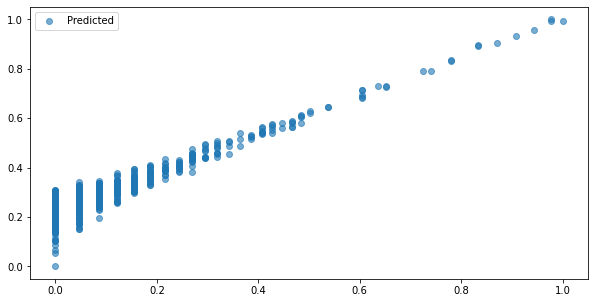

In [54]:
def power_transform(sequence, exponent):
    # Applica una trasformazione di potenza ai gradi per ridimensionare la gamma di valori
    transformed_degrees = np.power(sequence, exponent)
    # Normalizza i gradi trasformati su una scala da 0 a 1
    normalized_transformed_degrees = normalize_sequence(transformed_degrees)
    return normalized_transformed_degrees

# Applica la trasformazione alla sequenza di gradi
yan_normalized_degrees_pl = power_transform(degrees_power_law, 0.5)
yan_normalized_predicted_pl = power_transform(predicted_degrees_pl, 0.5)

plt.figure(figsize=(10, 5))
# Ora puoi plottare usando questi valori CDF normalizzati
plt.scatter(yan_normalized_degrees_pl, yan_normalized_predicted_pl, alpha=0.6, label='Predicted')
#plt.plot([0, 1], [0, 1], 'r--', label='Ideal')  
plt.legend()

### Verifiche di consistenza

In [ ]:
# verifico che i node embedding salvati in autoenc per epoch siano gli stessi già salvati usualmente , per ogni epoca e per ogni grafo
for epoca in range(xp.trainer.last_epoch):
    emb1 = np.array([e.node_embedding for e in xp.trainer.autoencoder_embedding_per_epoch[epoca].list_emb_autoenc_per_graph]).ravel()
    emb2 = xp.trainer.node_embedding_per_aepoch[epoca].squeeze()
    is_uguali = np.allclose(emb1, emb2, rtol=0.00001, atol=0.000001)
    if not is_uguali:
        print(f" epoca {epoca} - {is_uguali}")
num_grafi = xp.config_class.conf['graph_dataset']['Num_grafi_per_tipo'] * len(xp.config_class.conf['graph_dataset']['Num_nodes'])
for g in range(num_grafi):
    emb_graph1_last_epoch = xp.trainer.autoencoder_embedding_per_epoch[-1].list_emb_autoenc_per_graph[g].node_embedding.ravel()
    emb_graph2_last_epoch = xp.embedding_class.emb_pergraph[g].node_embedding_array.squeeze()
    is_uguali = np.allclose(emb_graph1_last_epoch, emb_graph2_last_epoch, rtol=0.00001, atol=0.000001)
    if not is_uguali:
        print(f" grafo {g} - {is_uguali}")
        
## quindi se non ho falsi vuol dire che quando uso l'autoencoder posso evitare di salvare gli embedding nell'altro modo
## ma ho tutto dentro l'oggetto Metric

In [ ]:
# quindi ora vedo cosa succede dall'embedding all'output
for epoca in range(xp.trainer.last_epoch):
    num_grafi = xp.config_class.conf['graph_dataset']['Num_grafi_per_tipo'] * len(xp.config_class.conf['graph_dataset']['Num_nodes'])
    for g in range(num_grafi):
        embg0 = xp.trainer.autoencoder_embedding_per_epoch[epoca].list_emb_autoenc_per_graph[g].node_embedding
        output_adj = xp.trainer.autoencoder_embedding_per_epoch[epoca].list_emb_autoenc_per_graph[g].decoder_output
        adj = np.matmul(embg0, embg0.T)
        res = adj / (1 + adj)
        is_uguali = np.allclose(res.ravel(),output_adj.ravel() )
        if not is_uguali:
            print(f" epoca {epoca} - {is_uguali}")
            
## se torna tutto senza falsi vuol dire che dall'embedding all'output non c'è problema di calcolo - un bel plot lo può dimostrare
###### ma devo riattivare il salvataggio per entrambi! al momento ho soltanto uno e disattivato l'altro

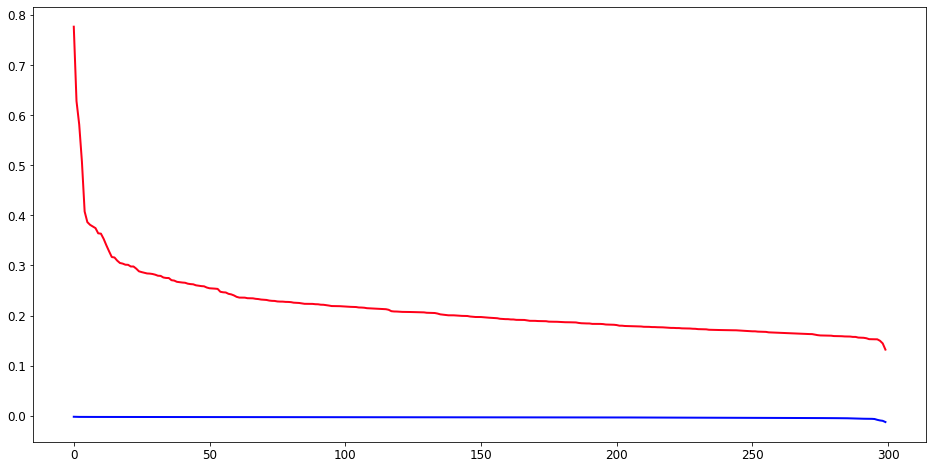

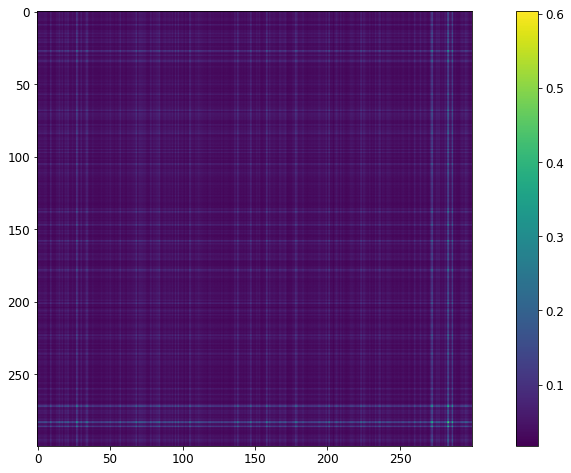

In [20]:
## plot dell'embedding e dell'output per un singolo grafo
num_grafo = 3
epoca = 0
embg0 = xp.trainer.autoencoder_embedding_per_epoch[epoca].list_emb_autoenc_per_graph[num_grafo].node_embedding
output_adj = xp.trainer.autoencoder_embedding_per_epoch[epoca].list_emb_autoenc_per_graph[num_grafo].decoder_output
embg0.shape, output_adj.shape
for dim in range(embg0.shape[1]):
    emb_sorted = sorted(embg0[:,dim], reverse=True)
    plt.plot(emb_sorted)
plt.show()
plt.imshow(output_adj)
plt.colorbar()
plt.show()

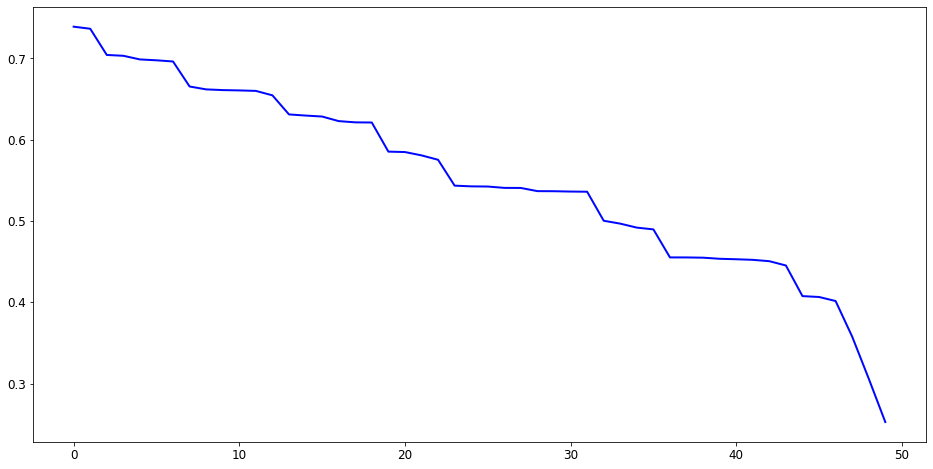

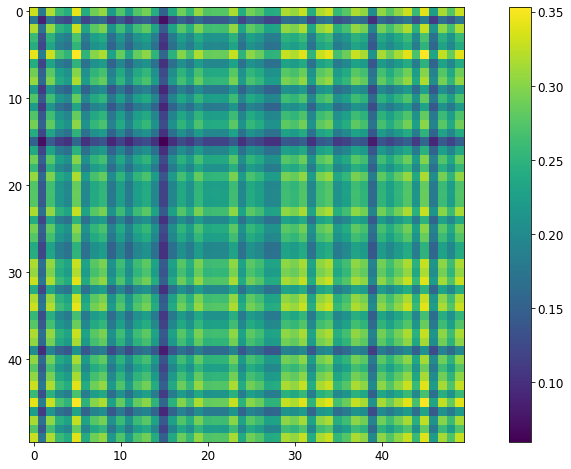

Run 1 		 exp name: GraphType-ER____Classi5_nodi200___________grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Mean connectivity for each node: 59.784 p=0.3
Mean connectivity for each node: 39.849 p=0.2
Mean connectivity for each node: 29.797 p=0.15
Mean connectivity for each node: 19.919 p=0.1
Mean connectivity for each node: 2.012 p=0.01
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:07<00:00, 32.93it/s]


Tempo impiegato: 7.6184844970703125


100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.71it/s]


test accuracy finale: 0
Plotting 1D embeddings...


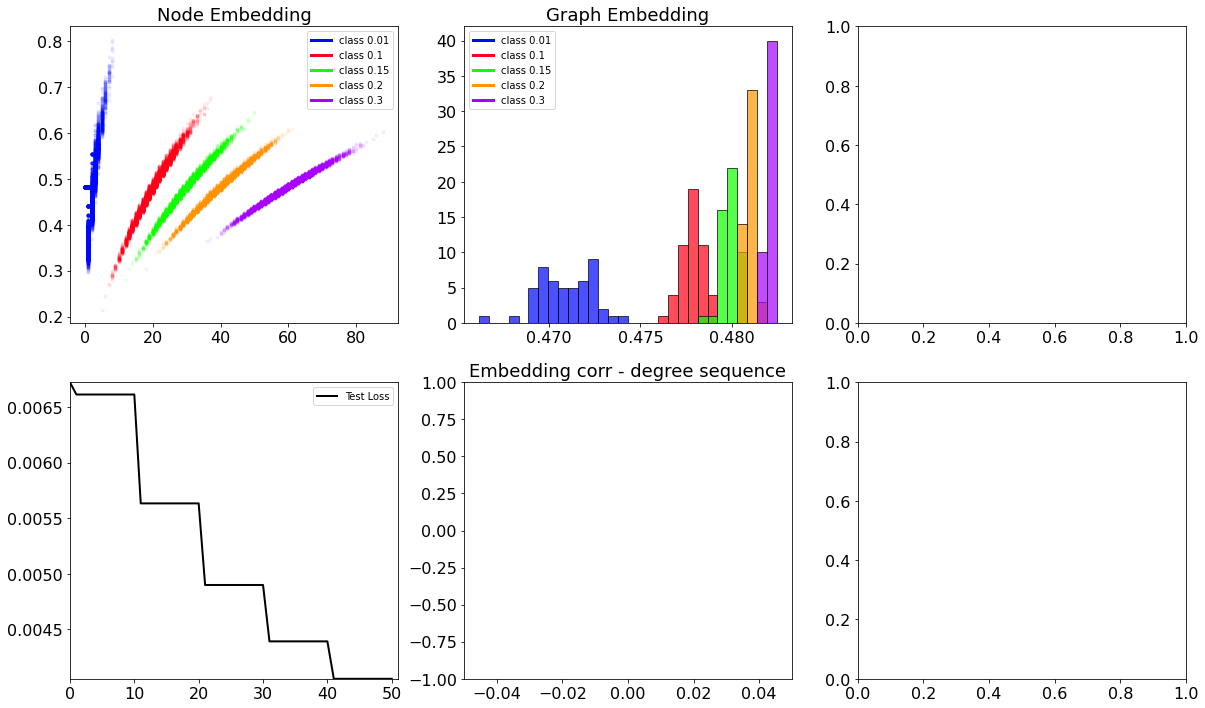

Run 2 		 exp name: GraphType-CM____Classi5_nodi200___________grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|███████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 127.10it/s]


Tempo impiegato: 1.9993860721588135


100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.78it/s]


test accuracy finale: 0
Plotting 1D embeddings...


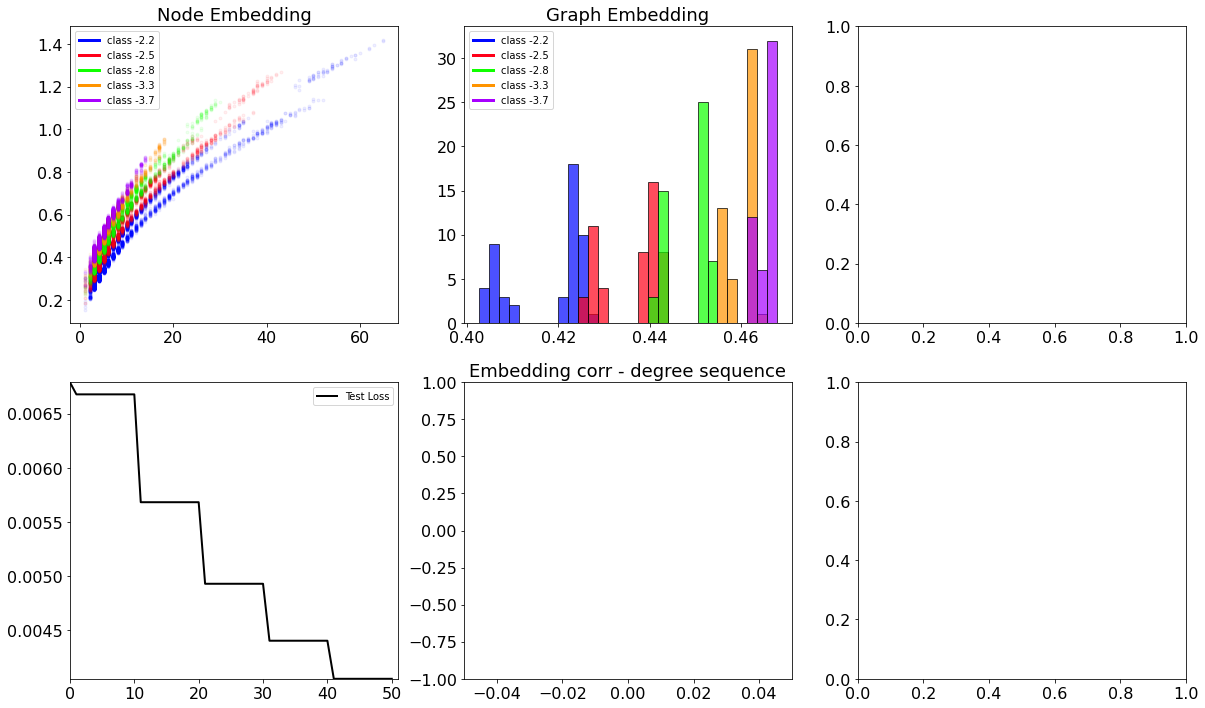

Run 3 		 exp name: GraphType-SBM___Classi3_nodi[200_100]____grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.16it/s]


Tempo impiegato: 10.612355709075928


100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.98it/s]


test accuracy finale: 0
Plotting 1D embeddings...


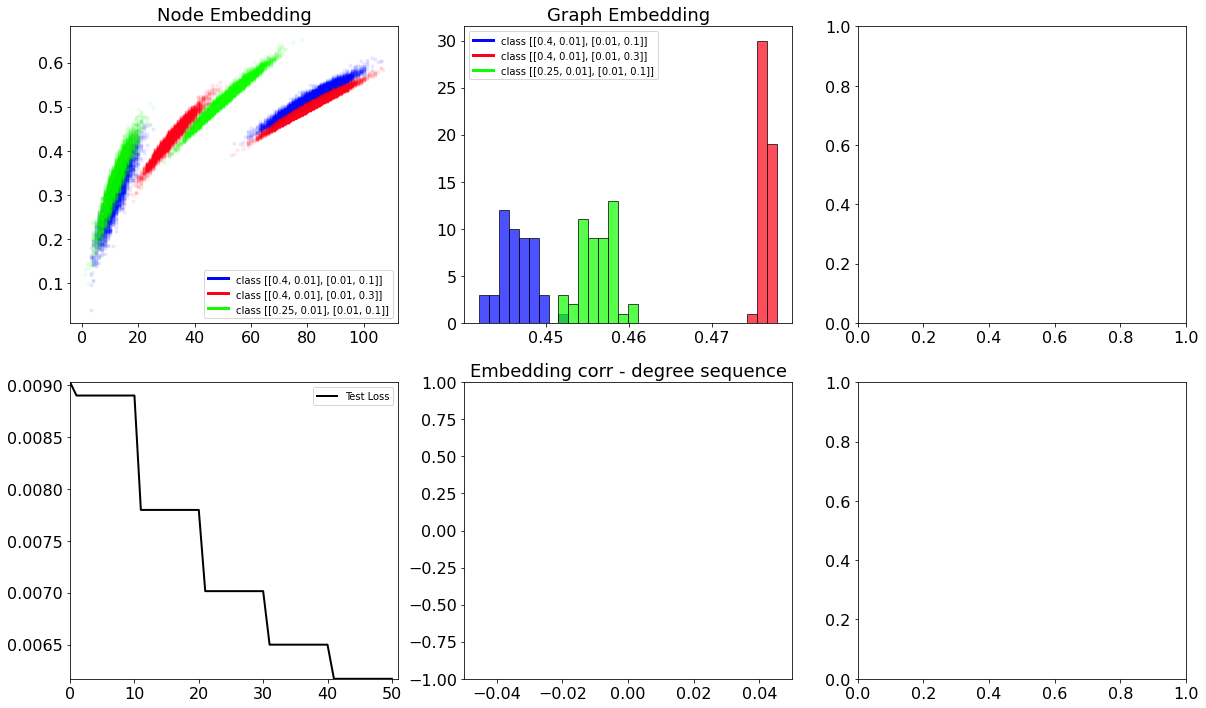

Run 1 		 exp name: GraphType-ER____Classi5_nodi200___________grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Mean connectivity for each node: 59.451 p=0.3
Mean connectivity for each node: 39.587 p=0.2
Mean connectivity for each node: 29.8 p=0.15
Mean connectivity for each node: 19.89 p=0.1
Mean connectivity for each node: 1.978 p=0.01
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:07<00:00, 34.93it/s]


Tempo impiegato: 7.185379981994629


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:30<00:00, 16.24it/s]


test accuracy finale: 0
Plotting 1D embeddings...


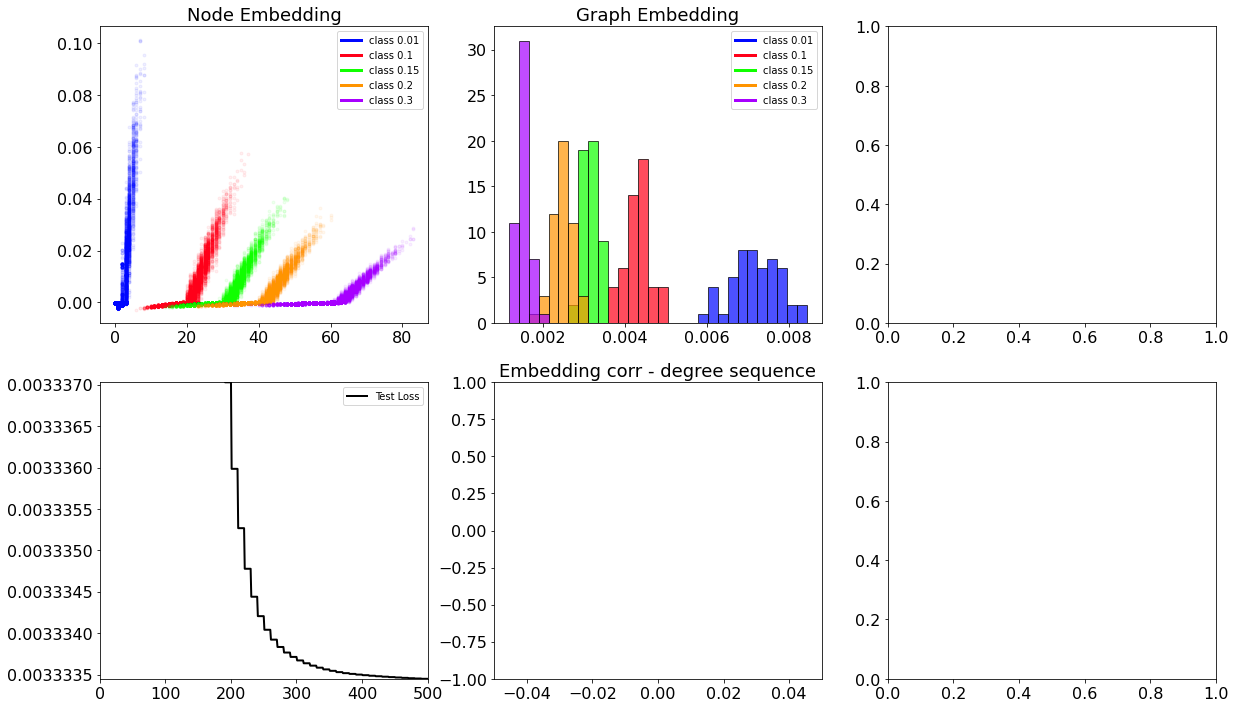

Run 2 		 exp name: GraphType-CM____Classi5_nodi200___________grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:02<00:00, 94.57it/s]


Tempo impiegato: 2.690424680709839


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:24<00:00, 20.55it/s]


test accuracy finale: 0
Plotting 1D embeddings...


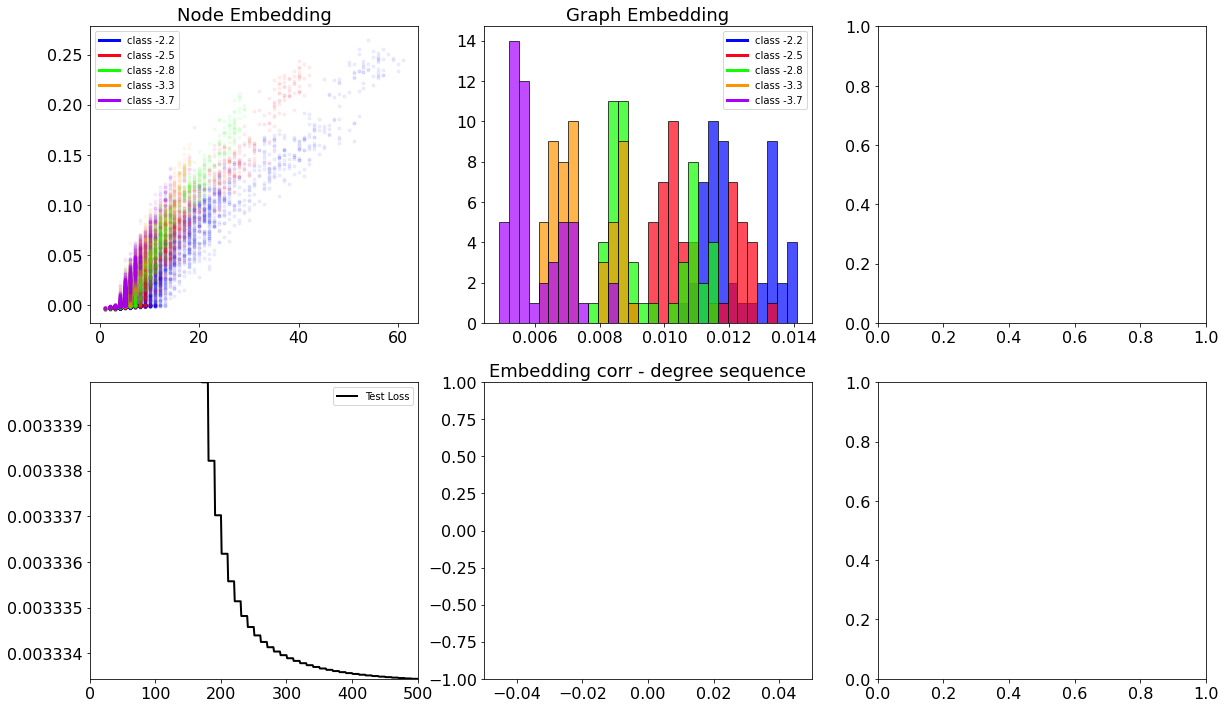

Run 3 		 exp name: GraphType-SBM___Classi3_nodi[200_100]____grafiXtipo50___AE_____layers§1-32-32-32-1§_initw-eye________lr0.002_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.52it/s]


Tempo impiegato: 10.35900092124939


100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:24<00:00, 20.30it/s]


test accuracy finale: 0
Plotting 1D embeddings...


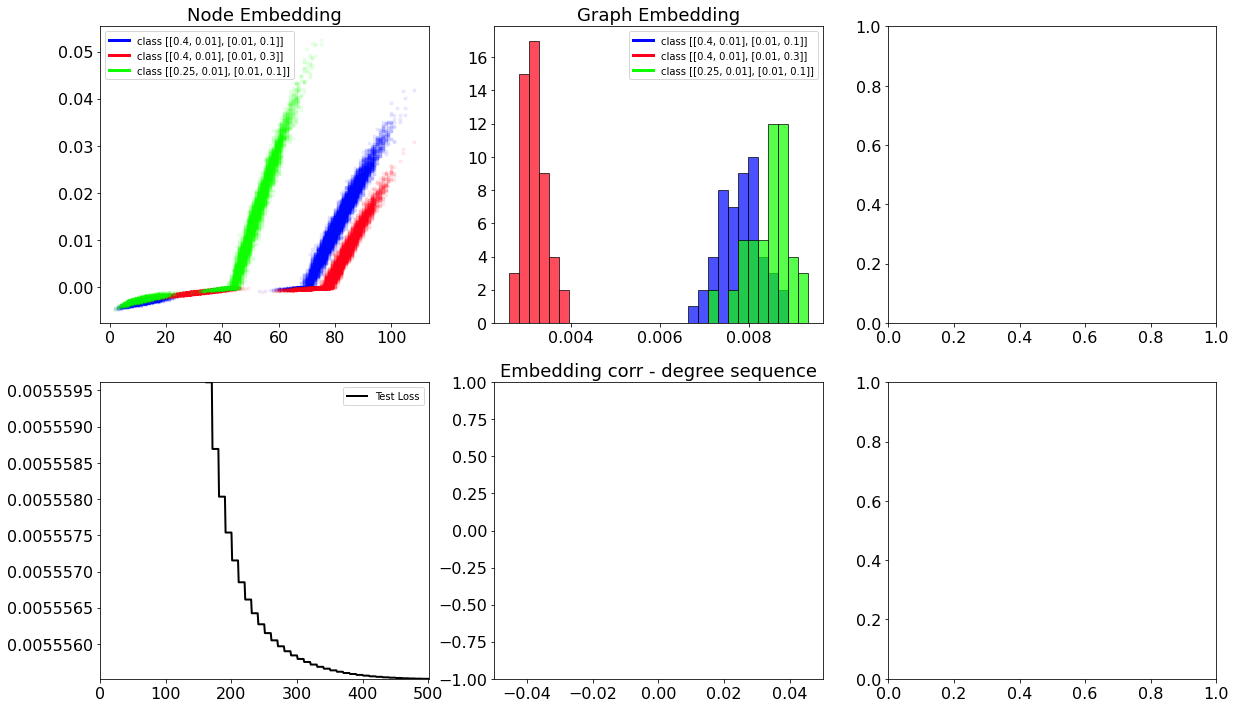

### Plots

In [7]:
embedding_class = xp.embedding()
embedding_dimension = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
dataset = xp.trainer.dataset
exp_config = xp.trainer.config_class
node_intrinsic_dimensions_total = [None] * xp.trainer.last_epoch
graph_intrinsic_dimensions_total = [None] * xp.trainer.last_epoch
node_correlation  = [None] * xp.trainer.last_epoch
graph_correlation = [None] * xp.trainer.last_epoch
plot_metrics(embedding_class, embedding_dimension, trainmode, xp.trainer.test_loss_list, xp.trainer.metric_list,
                         node_intrinsic_dimensions_total, graph_intrinsic_dimensions_total,
                         node_correlation, graph_correlation,
                         sequential_colors=True, log=False)

Plotting 2D or n>=2 embeddings...


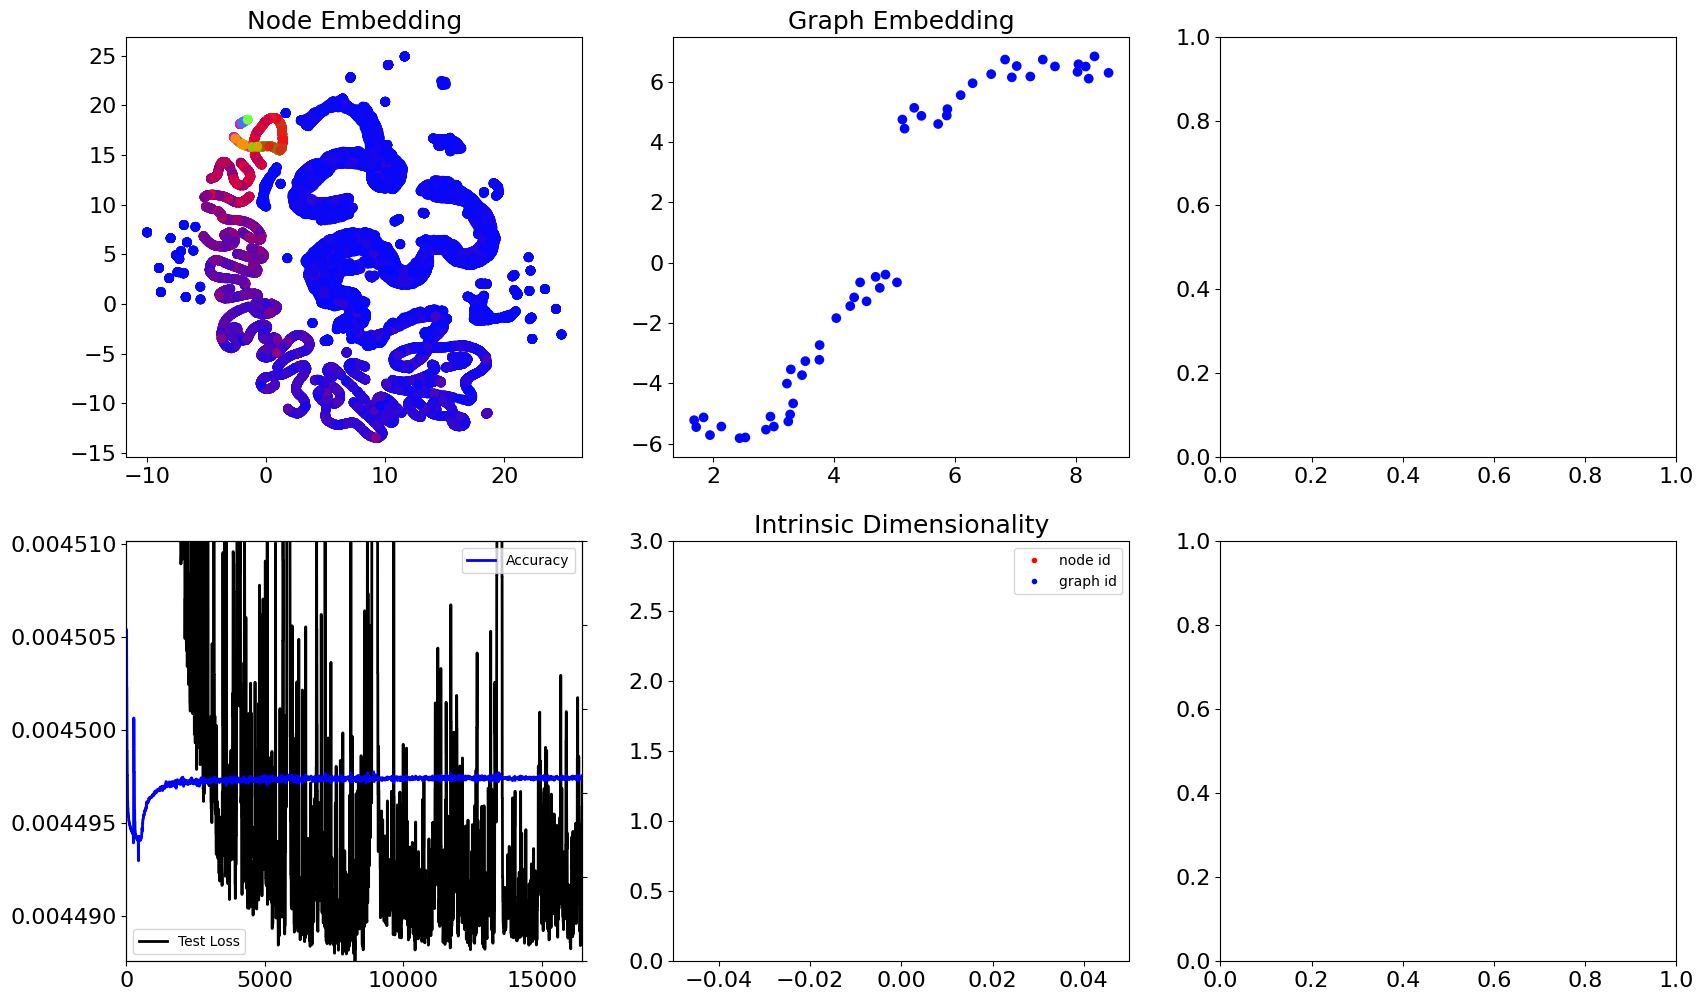

Plotting 1D embeddings...


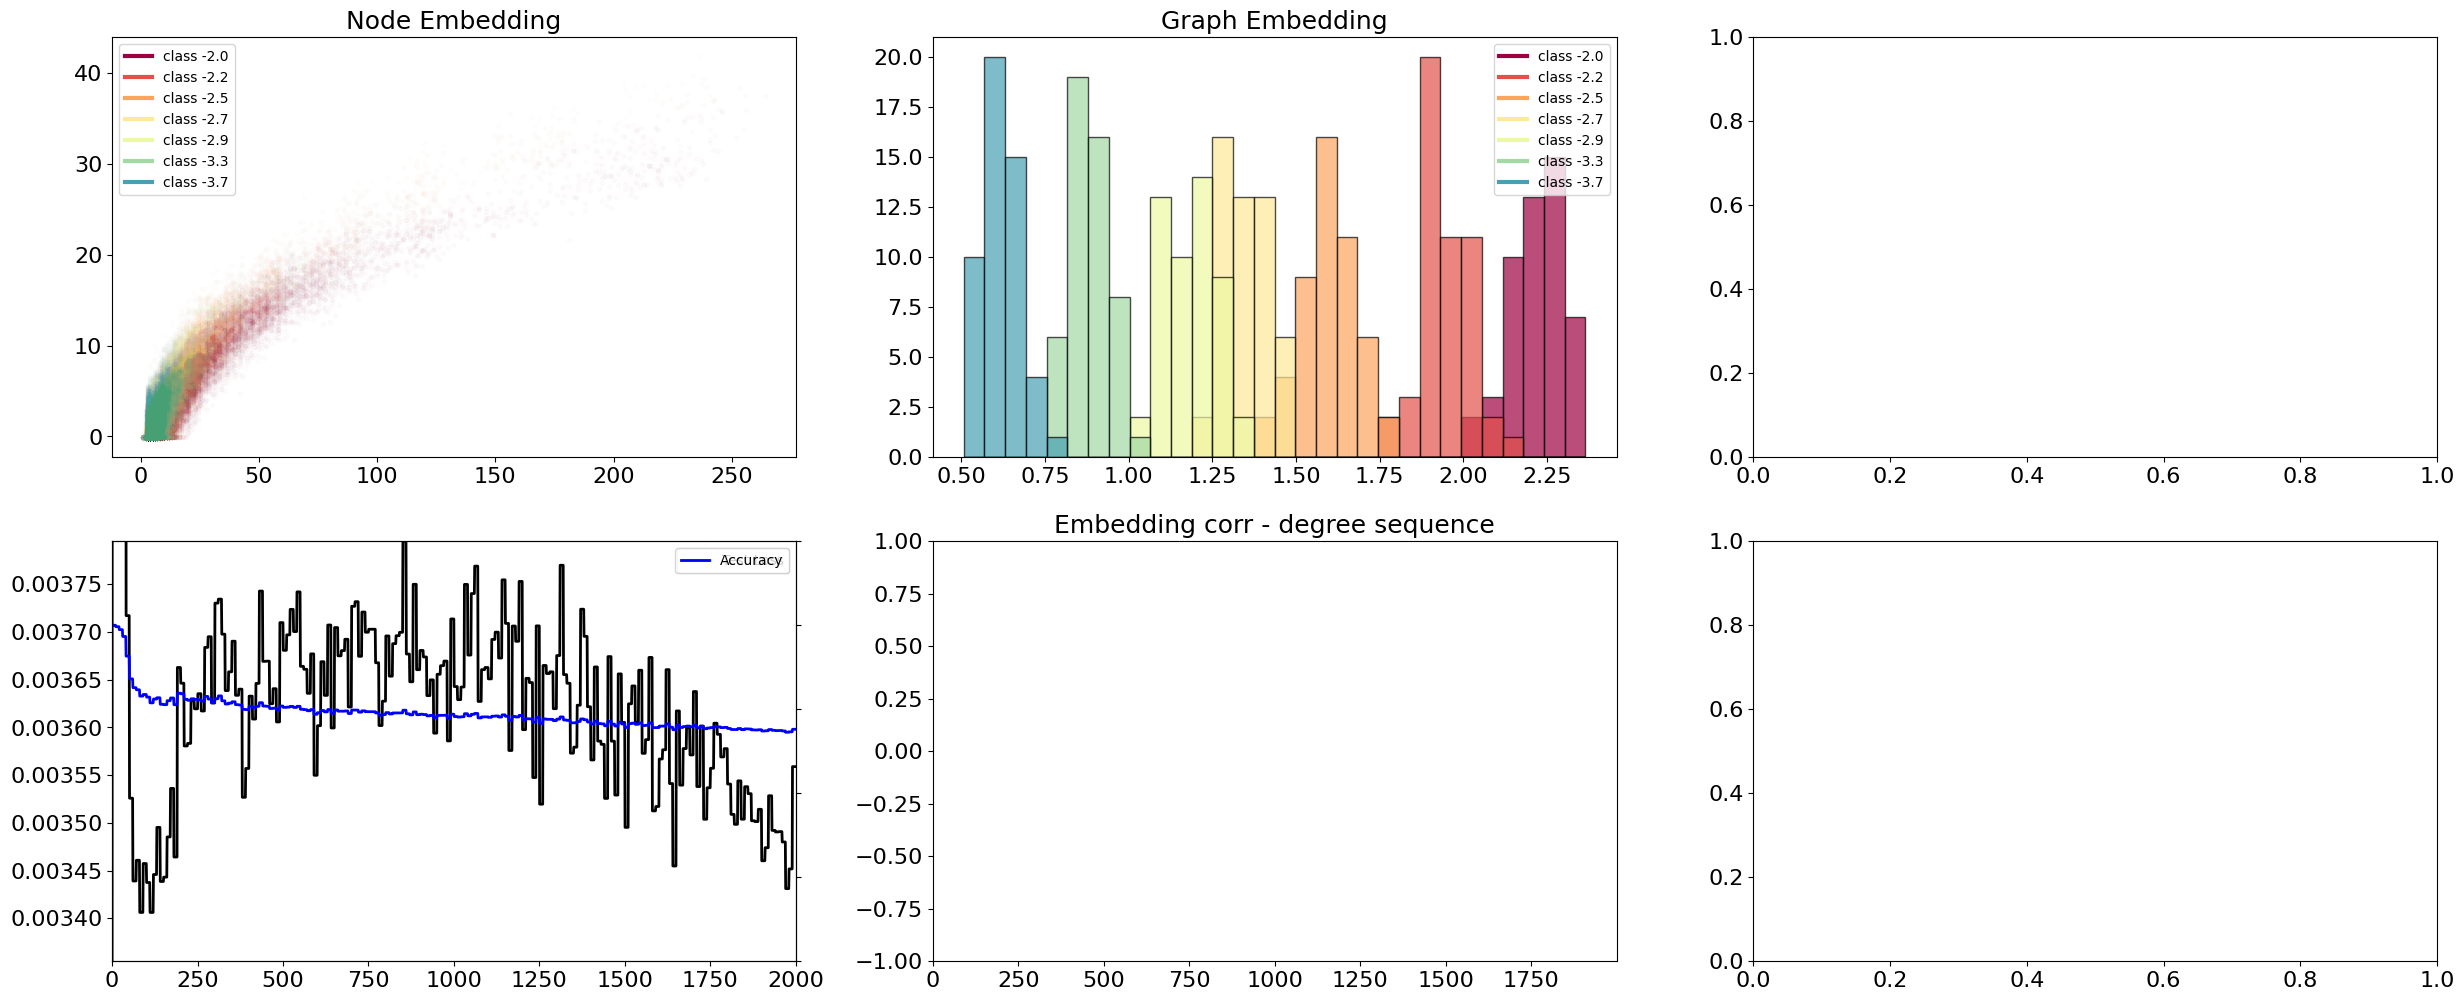

Run 1 		 exp name: GraphType.CM_Classi2_nodi600_grafiXtipo50_mode1_layers§1-32-2§_initw-xavier_normal_lr0.01_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████| 100/100 [00:05<00:00, 18.70it/s]


Tempo impiegato: 5.3508641719818115


100%|██████████| 2000/2000 [02:02<00:00, 16.34it/s]


test accuracy finale: 0.638800615101409
Plotting 2D or n>=2 embeddings...


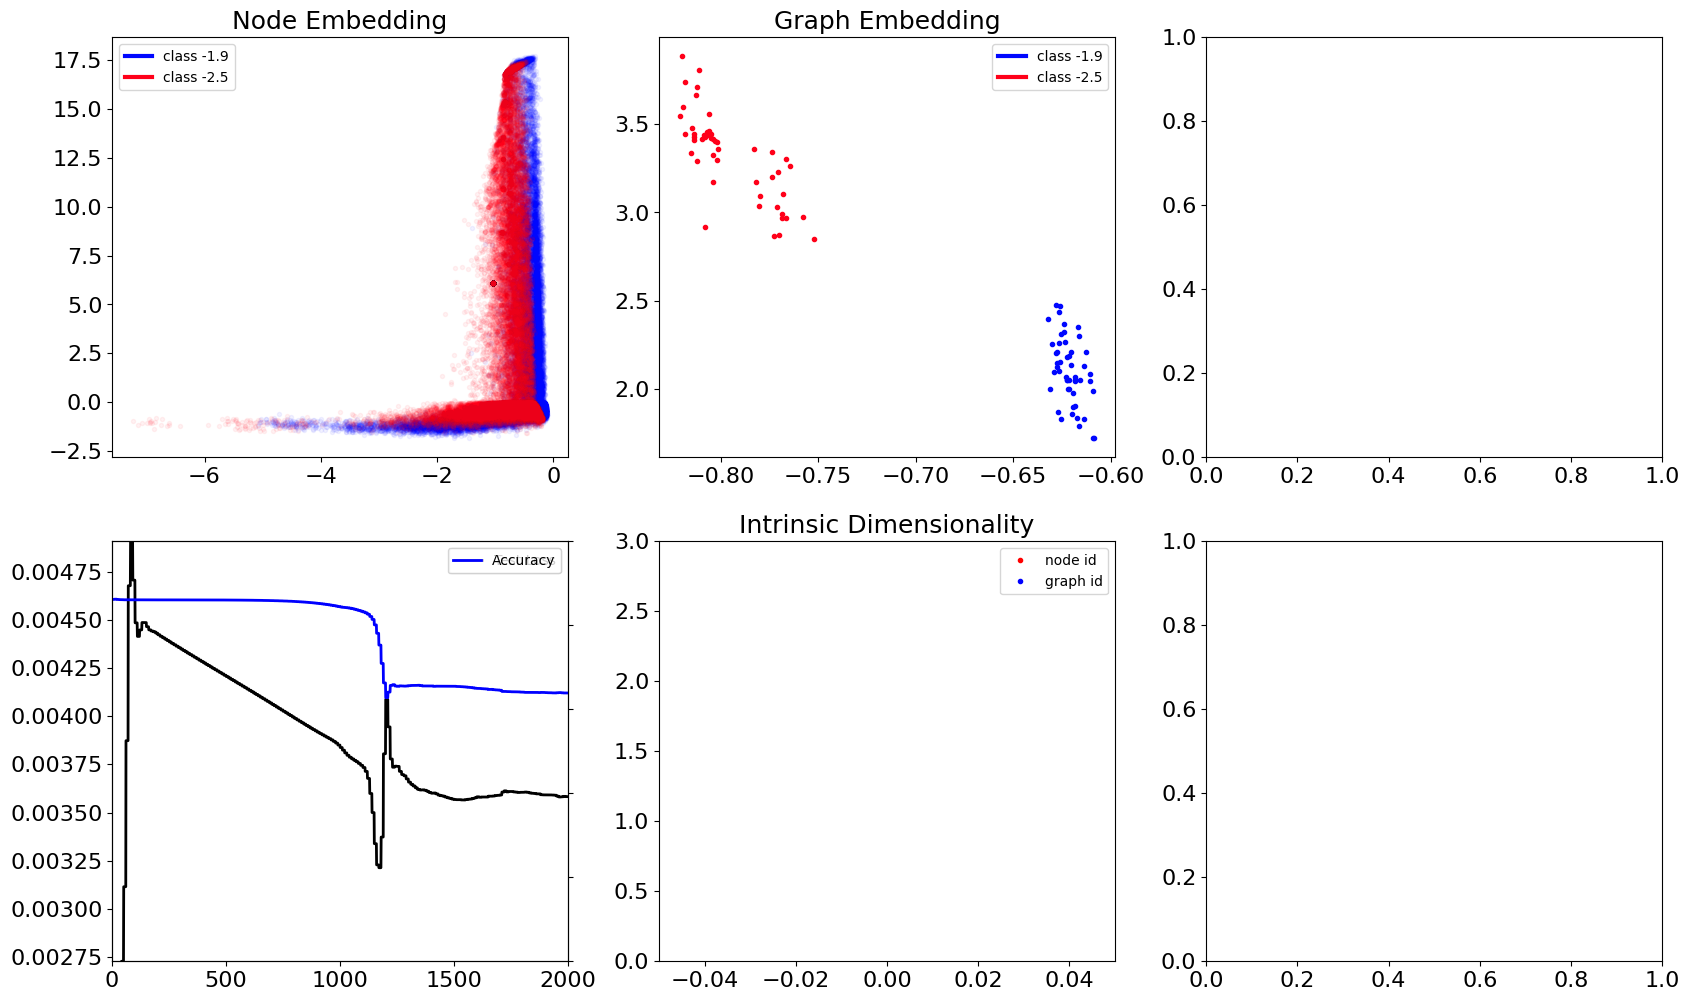

Run 1 		 exp name: GraphType.CM_Classi2_nodi300_grafiXtipo50_mode1_layers§1-32-2§_initw-xavier_normal_lr0.01_GCNfreezedFalse
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████| 100/100 [00:02<00:00, 42.63it/s]


Tempo impiegato: 2.349691152572632


100%|██████████| 2000/2000 [53:09<00:00,  1.59s/it]


test accuracy finale: 0.6366365526807078
Plotting 2D or n>=2 embeddings...


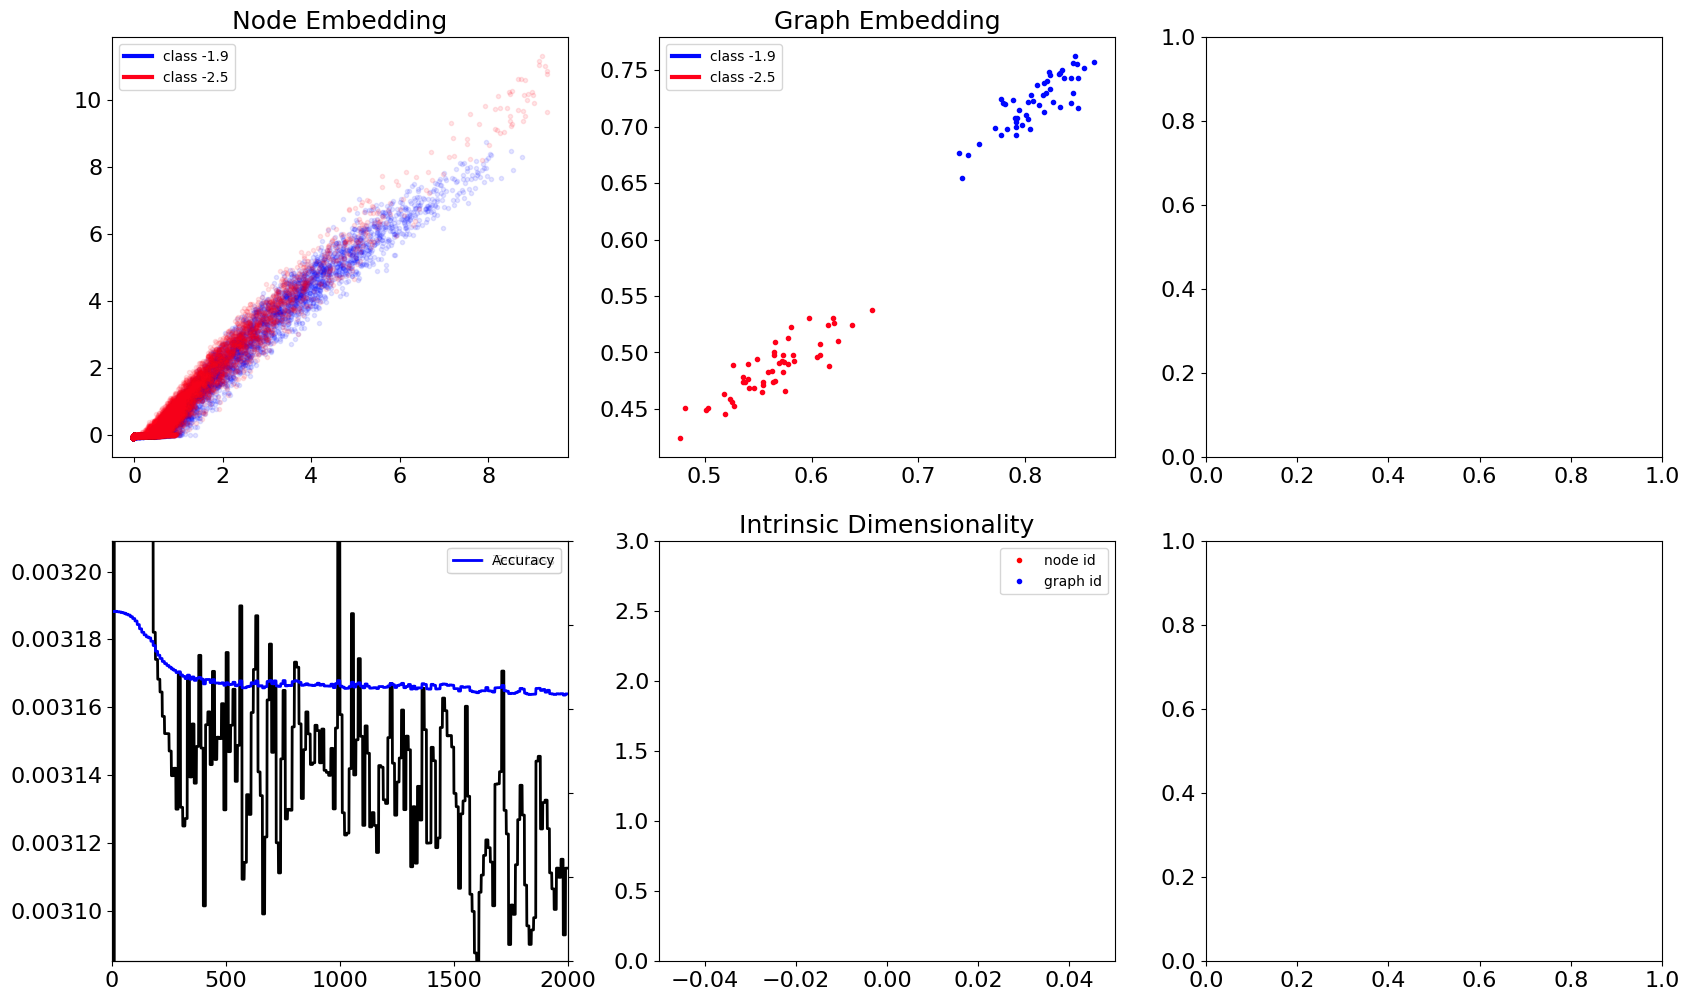

In [ ]:
embedding_class = xp.embedding()
embedding_dimension = xp.trainer.model.convs[-1].out_channels
trainmode = xp.trainer.config_class.modo
dataset = xp.trainer.dataset
exp_config = xp.trainer.config_class

Plotting 2D or n>=2 embeddings...


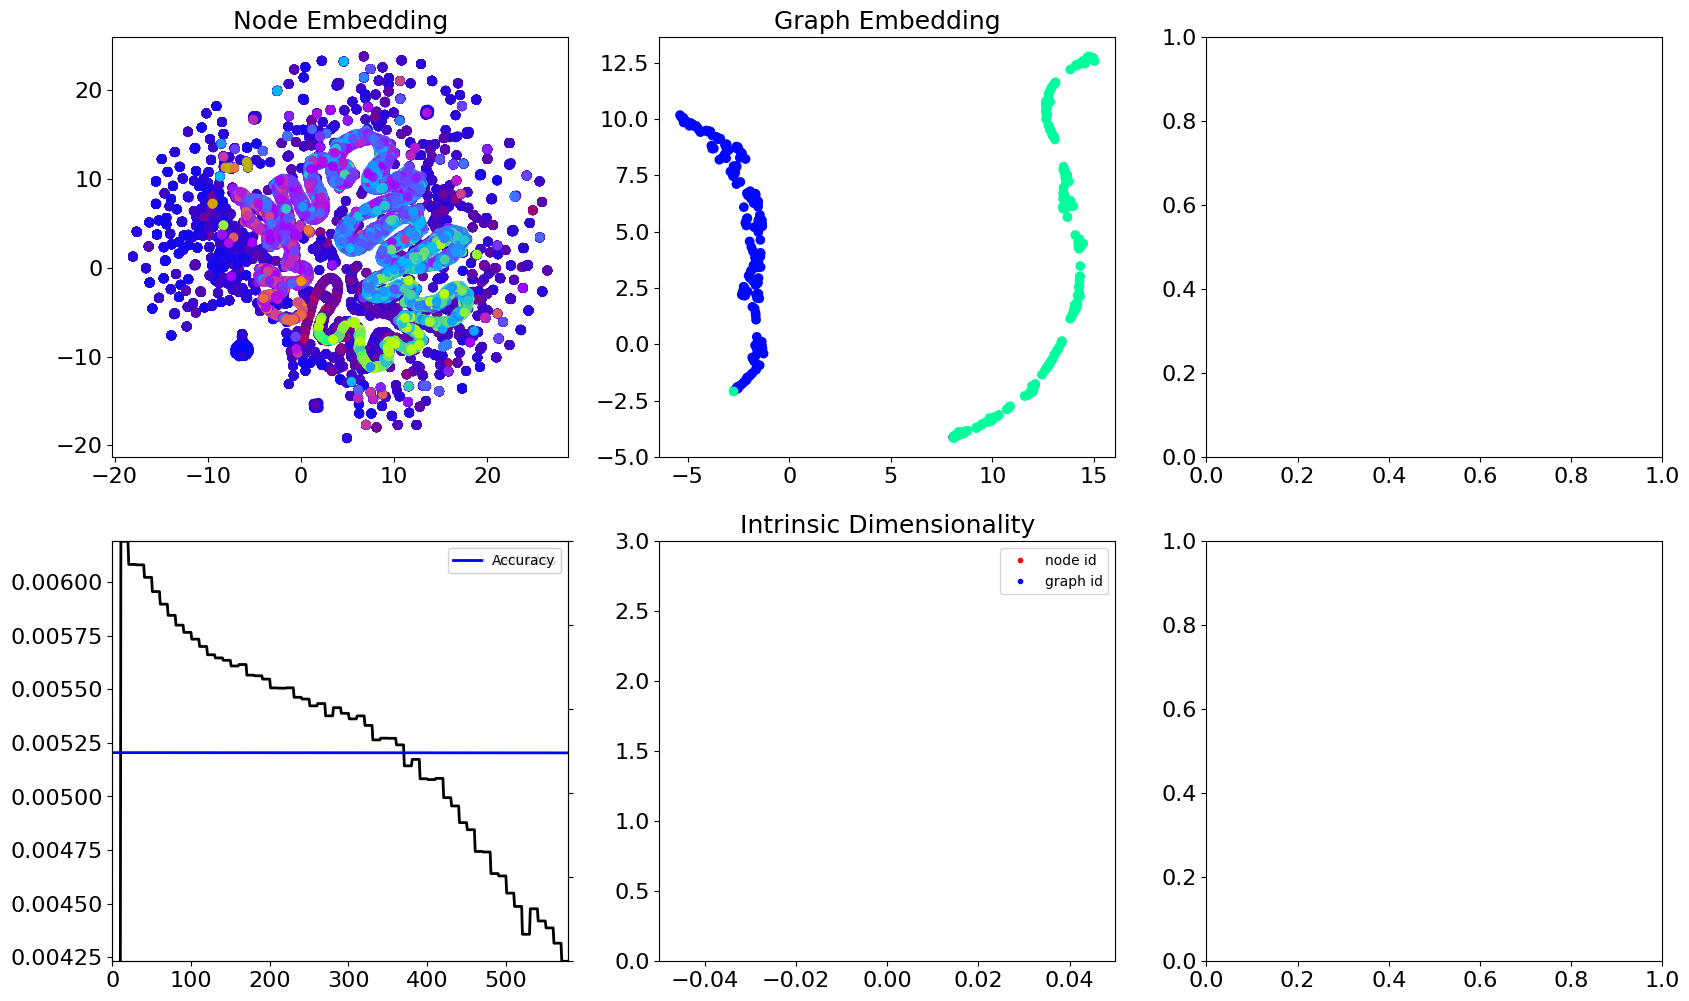

In [10]:
node_intrinsic_dimensions_total = [None] * xp.trainer.last_epoch
graph_intrinsic_dimensions_total = [None] * xp.trainer.last_epoch
node_correlation  = [None] * xp.trainer.last_epoch
graph_correlation = [None] * xp.trainer.last_epoch
plot_metrics(embedding_class, embedding_dimension, trainmode, xp.trainer.test_loss_list, xp.trainer.metric_list,
                         node_intrinsic_dimensions_total, graph_intrinsic_dimensions_total,
                         node_correlation, graph_correlation,
                         sequential_colors=False, log=False)

# Test su un nuovo dataset (di interpolazione) dei modelli salvati 

In [165]:
config_file = "configurations/Autoencoder_test.yml"
#num_nodi = 900
c = Config(config_file)
#c.conf['graph_dataset']['Num_nodes'] = [num_nodi]

gg = GenerateGraph(c)
gg.initialize_dataset(parallel=True)

Generating dataset...
Dataset generated


In [166]:
dataset = Dataset.from_super_instance(0.8, 600, 'cuda', c, gg.dataset)
dataset.prepare(shuffle=False)

100%|██████████| 600/600 [00:32<00:00, 18.52it/s]


Tempo impiegato: 32.482999324798584


In [169]:
for data in dataset.all_data_loader:
    total_batch_z_SIMPLE = model_simpleAE.encode(data.x, data.edge_index, data.batch) 
    total_batch_z_MIAGAE, _, _, _ = model_MIAGAE(data)
total_batch_z_SIMPLE = total_batch_z_SIMPLE.detach().cpu().numpy()
total_batch_z_MIAGAE = total_batch_z_MIAGAE.detach().cpu().numpy()

600


In [170]:
total_batch_z_SIMPLE.shape, total_batch_z_MIAGAE.shape

((540000, 1), (540000, 1))

In [150]:
wholebatch = list(dataset.all_data_loader)[0].detach().cpu()#.numpy()

In [151]:
#wholebatch.y

In [152]:
labels = np.unique(wholebatch.y.numpy(), axis=0)# == [0., 1.]

In [153]:
labels

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [155]:
m = (wholebatch.y.numpy() == labels[1]).all(axis=1)
m.shape

(600,)

In [114]:
np.unique(wholebatch.y.numpy()[150:], axis=0)

array([[1., 0.]], dtype=float32)

In [162]:
900*600

540000

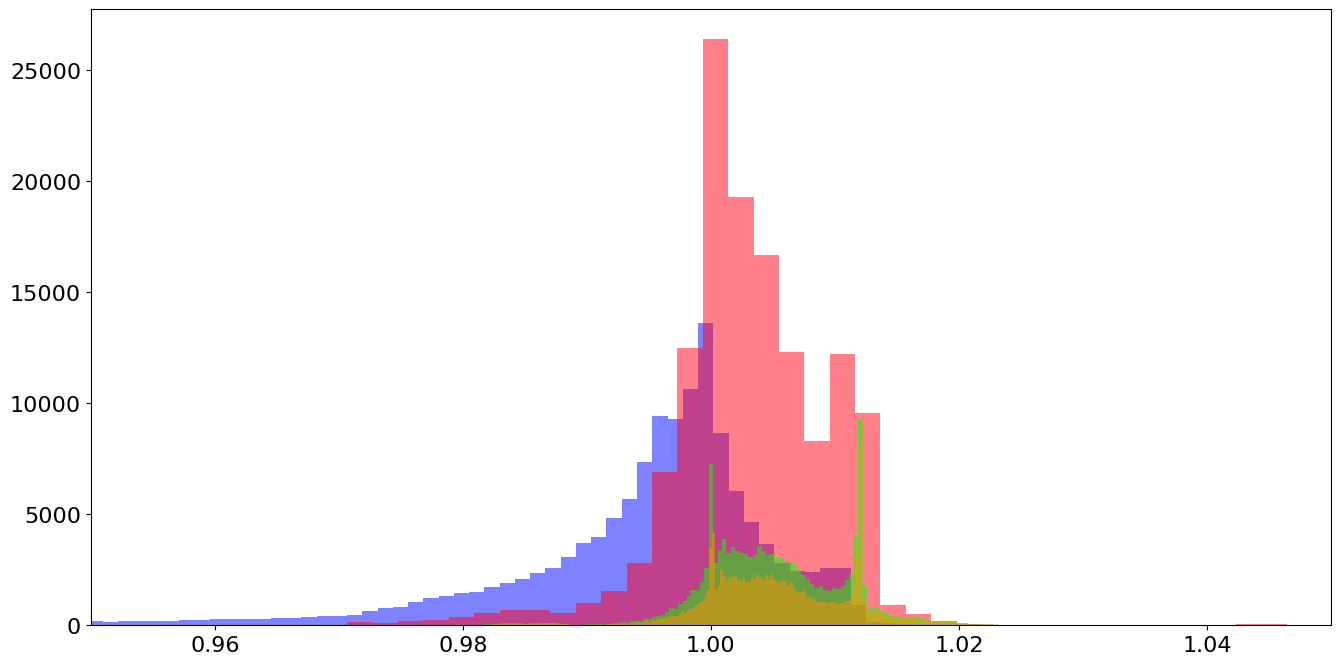

In [172]:
#for n in range(300
primi = 900*150
secondi = 900*300
terzi = 900*450
#for i in range(0, primi, 900):
b = 600
plt.hist(total_batch_z_MIAGAE[0:primi], bins=b, alpha=0.5)
plt.hist(total_batch_z_MIAGAE[primi:secondi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_MIAGAE[secondi:terzi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_MIAGAE[terzi:], bins=b, alpha=0.5) 
plt.xlim(0.95, 1.05)
plt.show()

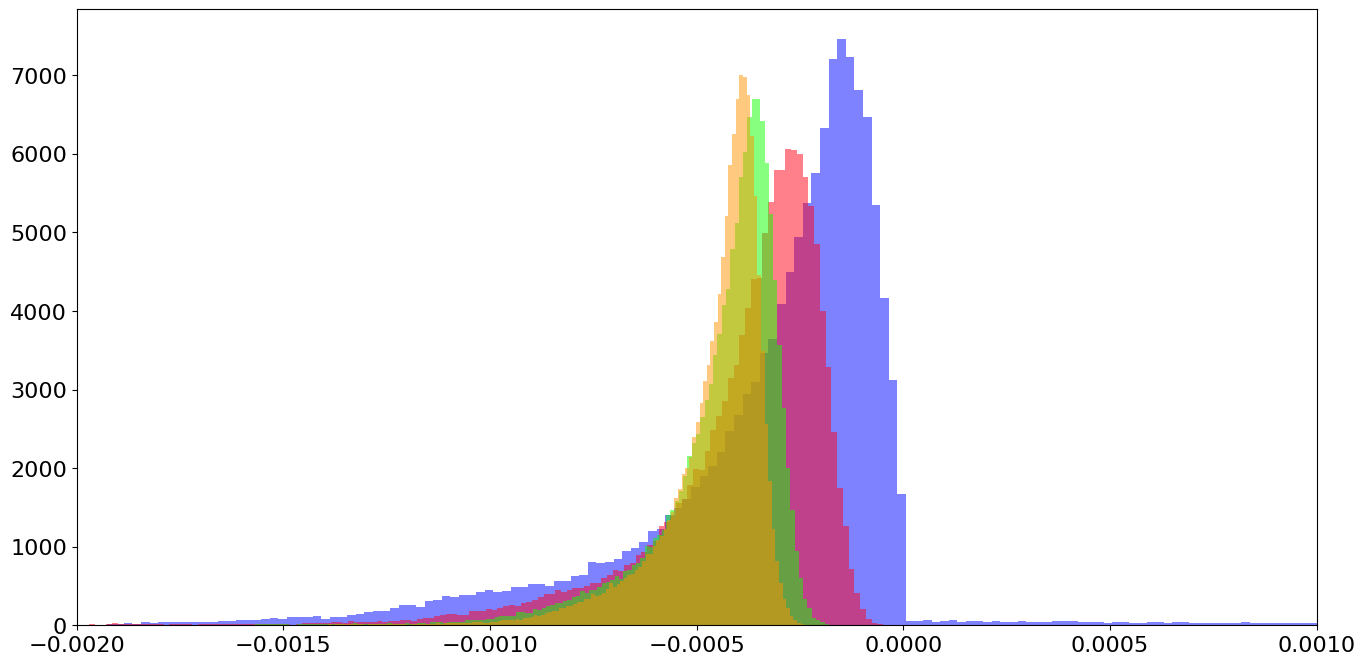

In [179]:
#for n in range(300
primi = 900*150
#for i in range(0, primi, 900):
b = 300
plt.hist(total_batch_z_SIMPLE[0:primi], bins=b, alpha=0.5)
plt.hist(total_batch_z_SIMPLE[primi:secondi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_SIMPLE[secondi:terzi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_SIMPLE[terzi:], bins=b, alpha=0.5) 
plt.xlim(-0.002, 0.001)
plt.show()

##### modello non trainato

In [130]:
init_weigths_method = c.init_weights_mode
w = new_parameters(xp.trainer.init_GCN(), init_weigths_method)
model_UNTRAINED = xp.trainer.init_GCN(init_weights_gcn=w)

In [182]:
for data in dataset.all_data_loader:
    total_batch_z_UNTRAINED = model_UNTRAINED.encode(data.x, data.edge_index, data.batch) 
total_batch_z_UNTRAINED = total_batch_z_UNTRAINED.detach().cpu().numpy()

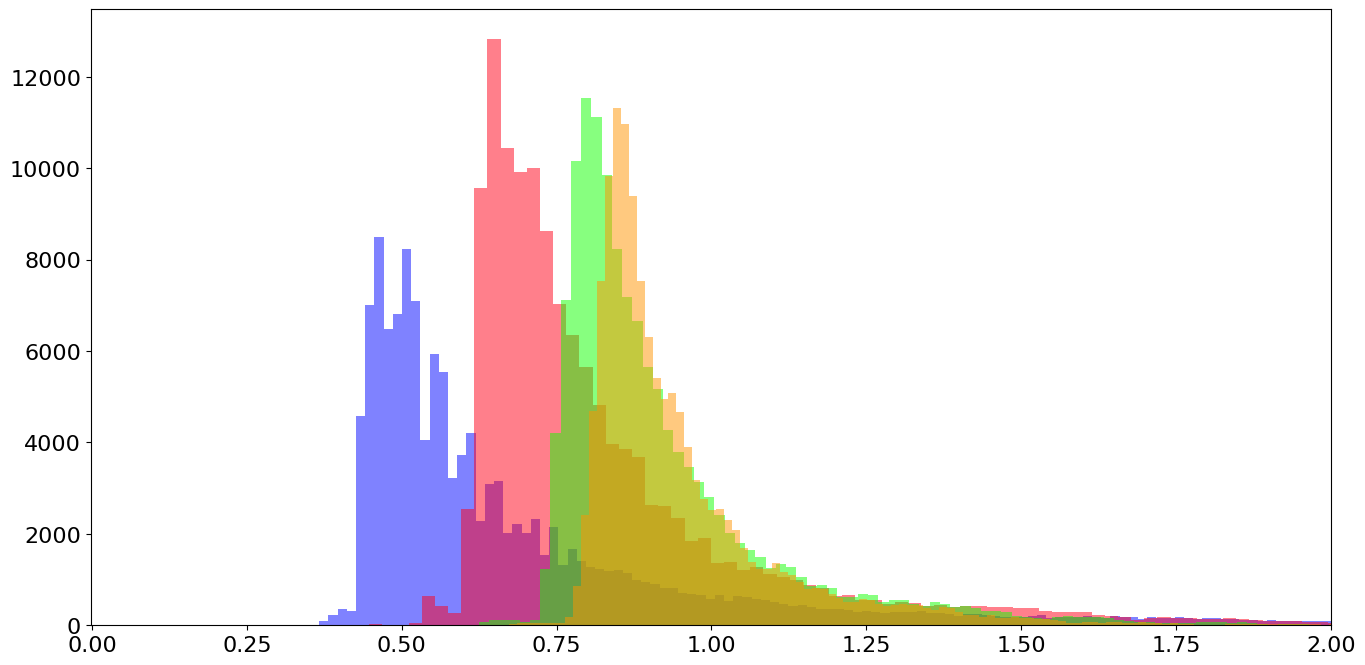

In [184]:
primi = 900*150
b = 300
plt.hist(total_batch_z_UNTRAINED[0:primi], bins=b, alpha=0.5)
plt.hist(total_batch_z_UNTRAINED[primi:secondi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_UNTRAINED[secondi:terzi], bins=b, alpha=0.5) 
plt.hist(total_batch_z_UNTRAINED[terzi:], bins=b, alpha=0.5) 
plt.xlim(-0.002, 2)
plt.show()

In [57]:
import pickle

with open('embedding_class.pickle', 'wb') as handle:
    pickle.dump(embedding_class, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
!ls -al embedding_class.pickle

-rw-r--r-- 1 root root 109889121 Mar 18 03:34 embedding_class.pickle


In [8]:
with open('embedding_class.pickle', 'rb') as handle:
    embedding_class = pickle.load(handle)

### VARIABILI frequenti

In [25]:
xp.trainer.config_class.num_classes , xp.trainer.embedding_dimension, xp.trainer.num_nodes_per_graph, xp.trainer.num_graphs

(7, 7, 600, 100)

# Autoencoder su singolo grafo (trasduttivo)

In [1]:
import torch
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, GAE
from torch_geometric.utils.convert import from_networkx
from torch_geometric.utils import train_test_split_edges
from torch.utils.tensorboard import SummaryWriter
transform4ae = T.RandomLinkSplit(num_val=0.0, num_test=0.3, is_undirected=True,
                                          split_labels=True, add_negative_train_samples=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### dataset reali
#### Citeseer - 3327 nodi, 3703 feature, 9104 edges , 6 classi  
#### Cora - 2708 nodi, 1433 feature, 10556 edges , 7 classi
#### PubMed - 19,717 nodi, 500 feature, 88,648 edges, 3 classi

In [10]:
tipo = ["PubMed", "CiteSeer", "cora"]
datasetchoice = tipo[1]

dataset = Planetoid("\..", datasetchoice, transform=T.NormalizeFeatures())
dataset.data
data = dataset[0]
#data.train_mask = data.val_mask = data.test_mask = None
#data = train_test_split_edges(data)

train_data, val_data, test_data = transform4ae(data)
x = data.x.to(device)
train_pos_edge_index = train_data.pos_edge_label_index.to(device)

data

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [11]:
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True) # cached only for transductive learning
        self.conv2 = GCNConv(2 * out_channels, out_channels, cached=True) # cached only for transductive learning

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)
    

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    #if args.variational:
    #   loss = loss + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()
    return float(loss)


def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

In [12]:
# parameters
out_channels = 2
num_features = dataset.num_features

#model
model = GAE(GCNEncoder(num_features, out_channels))
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


epochs = 3000
writer = SummaryWriter(f'runs/1graphGAE1_{datasetchoice}')
for epoch in range(1, epochs + 1):
    loss = train()
    auc, ap = test(test_data.pos_edge_label_index, test_data.neg_edge_label_index)
    #print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))
    
    
    writer.add_scalar('auc train',auc,epoch)
    writer.add_scalar('ap train',ap,epoch) 

### dataset sintetici

In [16]:
config_file = "configurations/Autoencoder_test.yml"
#num_nodi = 900
c = Config(config_file)
#c.conf['graph_dataset']['Num_nodes'] = [num_nodi]

gg = GenerateGraph(c)
gg.initialize_dataset(parallel=True)
#dataset = Dataset.from_super_instance(0.8, 600, 'cuda', c, gg.dataset)
#dataset.prepare(shuffle=False)

Generating dataset...
Dataset generated


In [24]:
len(gg.dataset.dataset_list[0].nodes()), len(gg.dataset.dataset_list[0].edges())

(13000, 67799)

In [25]:
grafo = gg.dataset.dataset_list[0]
nodi = list(grafo.nodes)
for n in nodi:
    grafo.nodes[n]["x"] = [1.0]
    grafo.nodes[n]["id"] = [n]

pyg_graph = from_networkx(grafo)
train_data, val_data, test_data = transform4ae(pyg_graph)

x = pyg_graph.x.to(device)
train_pos_edge_index = train_data.pos_edge_label_index.to(device)

In [26]:
def train():
    model.train()
    running_loss = 0
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    #if args.variational:
    #   loss = loss + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()    
    return float(loss.item())


def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

In [27]:
# parameters
out_channels = 2
num_features = 1

#model
model = GAE(GCNEncoder(num_features, out_channels))
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


epochs = 5000
writer = SummaryWriter('runs/1graphGAE1_CM-powerlaw')
for epoch in range(1, epochs + 1):
    loss = train()
    auc, ap = test(test_data.pos_edge_label_index, test_data.neg_edge_label_index)
    #print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))
    
    
    writer.add_scalar('auc train',auc,epoch)
    writer.add_scalar('ap train',ap,epoch) 


KeyboardInterrupt



# Loss tra tutte le matrici di adiacenza del training set

### Genero un dataset e ci calcolo la loss tra tutte le coppie di grafi input

In [2]:
%load_ext autoreload
%autoreload 2

from time import time
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from plt_parameters import init_params, get_colors_to_cycle_rainbow8, get_colors_to_cycle_rainbowN
init_params()
import itertools
from plot_model import plot_model, make_graph
from config_valid import Config
from models import GCN, AutoencoderGCN, ConfModelDecoder
from GridConfigurations import GridConfigurations
from graph_generation import GenerateGraph
from Dataset import Dataset
from train_autoencoder_inductive import Trainer_Autoencoder
from dictionary_of_trials import get_diz_trials, get_diz_trial4test
import torch
import torch.nn as nn
import networkx as nx
from scipy.interpolate import griddata

from graph_generation import rndm

from NEMtropy import UndirectedGraph, network_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


criterion_BCELoss_weighted = torch.nn.BCELoss(reduction='none')
criterion_BCELoss_unweighted = torch.nn.BCELoss()
criterion_BCELoss_sum = torch.nn.BCELoss(reduction='sum')
.....# la riduzione di default è reduction='mean'

def get_all_weights_for_loss(y_true):
    """
    se y_true e fatto di tutti zeri non va bene
    """
    uni = y_true.sum()
    tot = len(y_true)
    # al primo posto è il peso della classe negativa (0)
    positive_weight = (tot - uni) / uni  # è maggiore di 1
    #print(f"peso: {positive_weight}")
    # diz = {c: w for c, w in enumerate(positive_weight)}
    # torch.tensor([diz[y] for y in y_true])
    # visto che sono 1 e 0, moltiplico tutto l'array per positive_w-1, e poi sommo 1.
    return (y_true * (positive_weight - 1)) + 1
    
def calc_loss(pred_adj, input_adj):
    if is_weighted:
        unreduced_loss = criterion_BCELoss_weighted(pred_adj, input_adj)
        all_weights = get_all_weights_for_loss(input_adj)
        # print(f"allweights: {len(all_weights)}")
        # quì applico manualmente la riduzione media
        loss = (unreduced_loss.squeeze() * all_weights).mean()
    else:
        loss = criterion_BCELoss_unweighted(pred_adj, input_adj)
    return loss

def get_coppie_from_dataset(dataset):
    Adjs = np.array([nx.to_numpy_array(G) for G in dataset])
    NN = Adjs.shape[0]
    coppie_numeric = list(itertools.combinations(range(NN), 2))
    coppie = Adjs[coppie_numeric]
    #print(f"Ci sono {len(coppie)} coppie")
    return coppie

def calc_loss_input_datset(dataset):
    # questa  quella che uso nel training, perch prendo tutti gli embedding Z per il batch e prendo le matrici concatenate
    coppie = get_coppie_from_dataset(dataset)
    shape = coppie.shape[-1]    
    
    start_out1 = torch.empty((1, shape, shape))
    start_out2 = torch.empty((1, shape, shape))    
    for a1,a2 in coppie:
        start_out1 = torch.cat((start_out1, torch.tensor(a1).unsqueeze(0))) 
        start_out2 = torch.cat((start_out2, torch.tensor(a2).unsqueeze(0)))
    out1 = start_out1[1:].ravel()
    out2 = start_out2[1:].ravel()
        
    final_loss = calc_loss(out1, out2).item()
    return final_loss#, start_out1[1:], start_out2[1:]
    
def calc_loss2_input_datset(dataset):
    coppie = get_coppie_from_dataset(dataset)
    shape = coppie.shape[-1]
    losss = 0
    
    for a1,a2 in coppie:
        a1 = torch.tensor(a1).ravel() 
        a2 = torch.tensor(a2).ravel()
        l = calc_loss(a1, a2).item()
        losss += l
        print(f"a1 {a1}")
        print(f"a2 {a2}")
        print(f"loss: {l}")
    final_loss = l / len(coppie)
    return final_loss

is_weighted = True

In [3]:
#config_class = Config("configurations/Final1.yml")
base_path = "output_plots/autoencoder/85/"
config_class, diz_trials = get_diz_trial4test("configurations/Final1.yml")#_4modelloading.yml")

gc = GridConfigurations(config_class, diz_trials)
gc.make_configs()

losses = []
ps = []
nodi = []
grafi = []
for config_class in gc.configs:
    p = config_class.conf['graph_dataset']['list_p']
    n = config_class.conf['graph_dataset']['Num_nodes'][0]
    gs = config_class.conf['graph_dataset']['Num_grafi_per_tipo']    
    ps.append(p)
    nodi.append(n)
    grafi.append(gs)
    
    trainer = Trainer_Autoencoder(config_class, rootsave='')  # rootsave none non crea la cartella che tanto non serve ora   (Path(base_path))  
    trainer.init_dataset()
    trainer.load_dataset(trainer.gg.dataset)
    start = time()
    final_loss = trainer.calc_loss_input_dataset_ER(trainer.dataset.all_data_loader)
    end = time()
    losses.append(final_loss)
    
    print(f"Tempo per il calcolo della loss: {round(end-start, 2)}")
    

primo config base fatto
0 configurazioni saltate su 9, farò i seguenti 9 training: 
ER__[01]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[02]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[03]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[04]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[05]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[06]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-xavier_normal___#__lr1100005599e-05_ADAMW_BCELoss
ER__[07]_Classi1_nodi300_grafiX10___#__AE_CM______§1-32-32-32§____ELU+RELU__btchnrmNO__-

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.27it/s]


Tempo per il calcolo della loss: 0.06
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.33it/s]


Tempo per il calcolo della loss: 0.02
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.73it/s]


Tempo per il calcolo della loss: 0.01
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.17it/s]


Tempo per il calcolo della loss: 0.02
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.74it/s]


Tempo per il calcolo della loss: 0.02
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.45it/s]


Tempo per il calcolo della loss: 0.02
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.26it/s]


Tempo per il calcolo della loss: 0.02
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.05it/s]


Tempo per il calcolo della loss: 0.01
Generating dataset...
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.03s/it]

Tempo per il calcolo della loss: 0.01


### Contour Plot LOSS vs. NODI,GRAFI

In [10]:
#x_mesh, y_mesh = np.meshgrid(np.linspace(min(nodi), max(nodi), 100),
#                             np.linspace(min(grafi), max(grafi), 100))
x_mesh, y_mesh = np.mgrid[min(nodi):max(nodi):100j, min(grafi):max(grafi):100j]
# Calcolo dei valori di z_mesh basati su x_mesh e y_mesh tramite interpolazione
z_mesh = griddata((nodi, grafi), losses, (x_mesh, y_mesh), method='linear')

In [16]:
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

def plot_dataset_own_loss(title, xlabel, ylabel):
    plt.figure(figsize=(8,6))
    v = np.linspace(0.0, 1.9, 15, endpoint=True)
    plt.contourf(x_mesh, y_mesh, z_mesh, levels=v, cmap="viridis")
    #plt.clim(0.5,0.8)
    res = plt.colorbar()  #ticks=v)
    res.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.gca().yaxis.set_major_formatter(ScalarFormatter()) 
    plt.gca().yaxis.set_minor_formatter(ScalarFormatter());
    plt.xlabel('Num nodi')
    plt.ylabel('Num grafi')
    plt.title(title)
    plt.xscale('log')
    #plt.ticklabel_format(style='plain', useOffset=False)
    plt.savefig(title)
    plt.show()
    

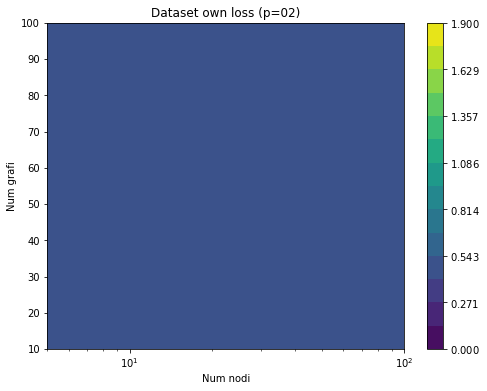

In [17]:
p_ER = str(config_class.conf['graph_dataset']['list_p']).replace('[','').replace(']','').replace('.','')
plot_dataset_own_loss(title=f"Dataset own loss (p={p_ER})", xlabel='Num nodi', ylabel='Num grafi')

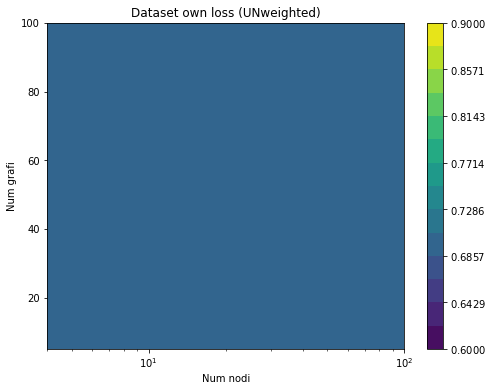

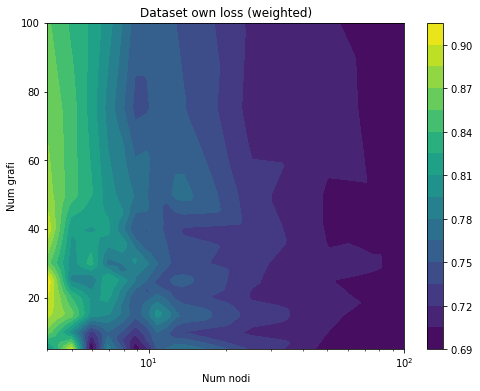

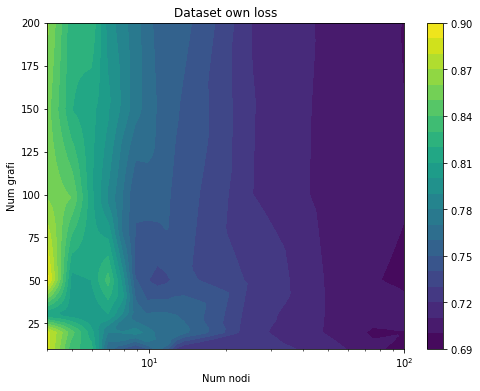

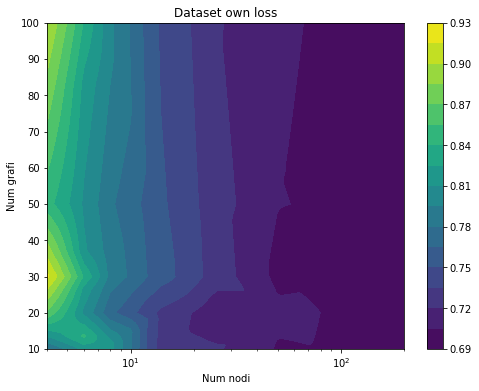

### Plot LOSS vs. P Erdos-Renyi

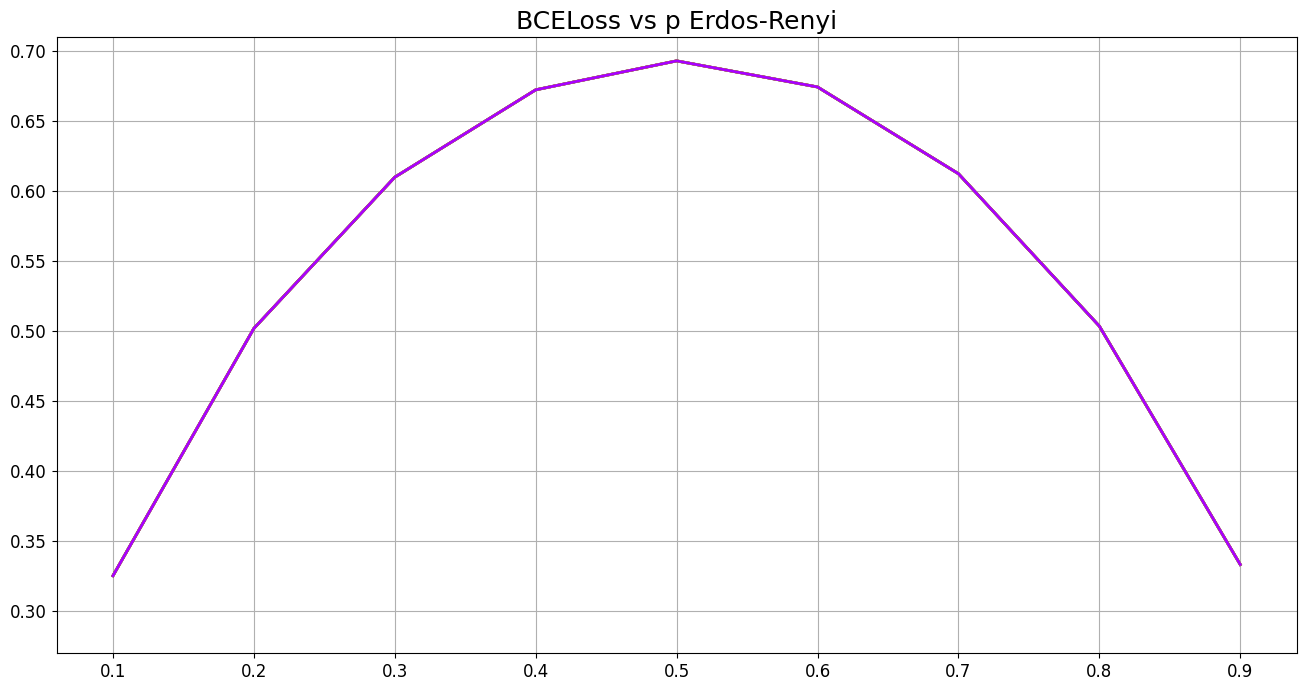

In [8]:
%matplotlib inline
plt.plot(ps, losses)
plt.title("BCELoss vs p Erdos-Renyi")
plt.ylim(0.27,0.71)
plt.grid()
#plt.savefig("BCELoss_vs_p_Erdos-Renyi")
plt.show()

In [19]:
path = "output_plots/autoencoder/8/ER__[011]_Classi-1_nodi40__grafiX40___#__AE_CM______§1-200-1§_______ELU+RELU__grphnorm__-eye________#__lr00007_ADAMW_BCELoss/_degseq_tot_epoch350.npy"
input_seq = "output_plots/autoencoder/8/ER__[011]_Classi-1_nodi40__grafiX40___#__AE_CM______§1-200-1§_______ELU+RELU__grphnorm__-eye________#__lr00007_ADAMW_BCELoss/_degseq_totale.npy"

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
eq.ravel().squeeze().shape, arr.shape

((1600,), (480,))

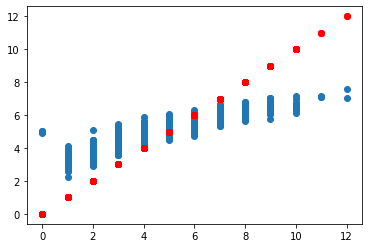

In [21]:
arr = np.load(path)
eq = np.load(input_seq).ravel().squeeze()
plt.scatter(eq, arr, label="Predicted")
plt.scatter(eq, eq, label="Input", color='red')

In [4]:
!pwd

/home/daniele/Documenti/Progetti/Networks/Embednet


### Confirguration Model

In [3]:
Num_nodes = 350
exponent = -2.1
s = rndm(3, Num_nodes, exponent, Num_nodes)
s = np.array(s, int)
min(s), max(s), len(s)

(3, 267, 350)

#### plot

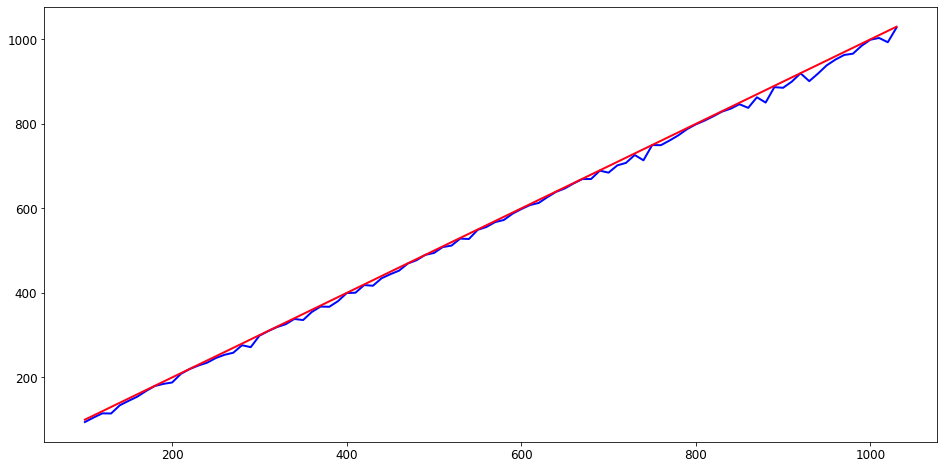

In [81]:
# voglio vedere come varia il grado massimo in funzione del numero di nodi che metto
nodi = range(100, 1031, 10)
maxes = [max(rndm(3, n, exponent, n)) for n in nodi]
plt.plot(nodi, maxes)
plt.plot(nodi,nodi)

In [ ]:
### quindi ok ce la fa ad arrivare al grado massimo sempre

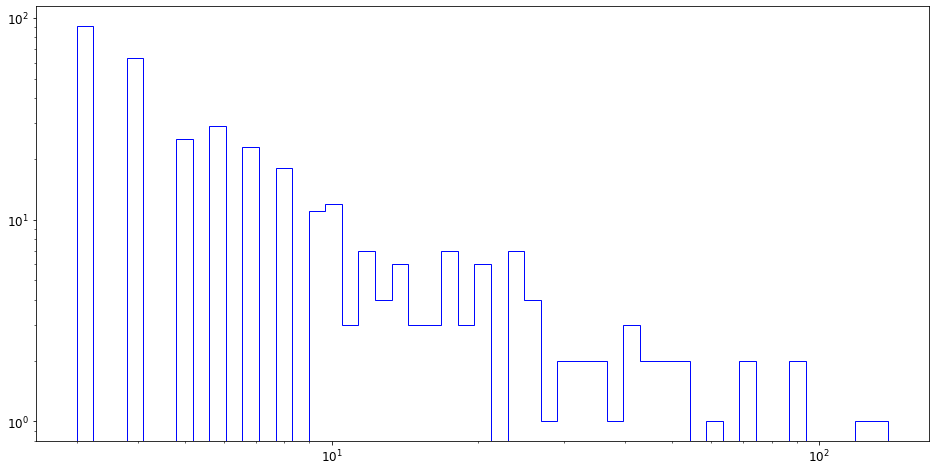

In [85]:
counts = np.unique(s, return_counts=True)
degree_sorted = sorted(s, reverse=True)
#plt.loglog(*counts)
#plt.loglog(degree_sorted, '.')
bins = np.logspace(np.log10(min(s)),np.log10(max(s)), 50)
#bins=50
plt.hist(degree_sorted, bins=bins, histtype='step');
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

In [86]:
n, b = np.histogram(degree_sorted, bins)
n_, b_ = np.histogram(degree_sorted, 50)

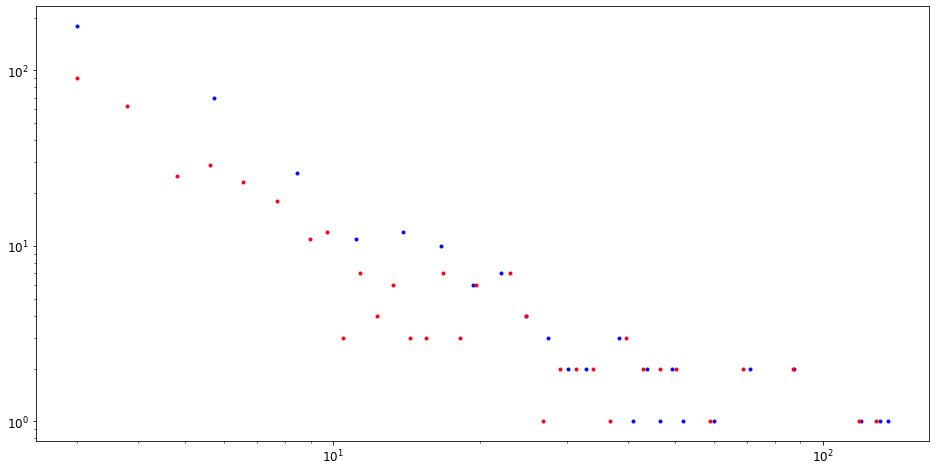

In [87]:
#plt.loglog(degree_sorted, '.')
plt.loglog(b_[:-1], n_, '.')
plt.loglog(b[:-1], n, '.')

#### tiziano advise

In [ ]:
# costruisco così una p_ij, così ho la garanzia che è una matrice con seq di grado valida: 
# questa seq di grado deriva da una power law perché così erano le x
# questa seq di grado è usata poi dal CM di nemtropy per generare il dataset
# ma ho comunque la matrice di p_ij che è ina matrice 'costante' su cui calcolare la loss

In [5]:
# s sarebbe la fitness x
x = np.array(s)
ps = x*x[:,np.newaxis]
p_ij = ps/(1+ps)
p_ij.shape

(350, 350)

In [6]:
graph = UndirectedGraph(p_ij)
graph.solve_tool(model="cm_exp",
             method="newton",
             initial_guess="random")


solution error = 1.0


In [7]:
res = graph.ensemble_sampler(10, cpu_n=None, output_dir="None")

In [10]:
#network_functions.build_adjacency_from_edgelist(np.array(res[0]), is_directed=False)
adjs = [network_functions.build_adjacency_from_edgelist(np.array(r), is_directed=False) for r in res]

In [13]:
type(adjs[0])

numpy.ndarray

In [20]:
a = np.array([[0, 1, 2],[0, 1, 2]])
np.tile(a, (3,1,1))

array([[[0, 1, 2],
        [0, 1, 2]],

       [[0, 1, 2],
        [0, 1, 2]],

       [[0, 1, 2],
        [0, 1, 2]]])

In [21]:
#config_class = Config("configurations/Final1.yml")
base_path = "output_plots/autoencoder/7/"
config_class, diz_trials = get_diz_trial4test("configurations/Final1_4modelloading.yml")

gc = GridConfigurations(config_class, diz_trials)
gc.make_configs()
config_class = gc.configs[0]

trainer = Trainer_Autoencoder(config_class, rootsave=Path(base_path))
trainer.init_dataset()
trainer.load_dataset(trainer.gg.dataset)
final_loss = trainer.calc_loss_input_dataset_CM(trainer.dataset.all_data_loader)

primo config base fatto
0 configurazioni saltate su 1, farò i seguenti 1 training: 
CM__[-22]_Classi-1_nodi4___grafiX10___#__AE_CM______§1-32-32-16§____ELU+RELU__btchnrmSI__-xavier_normal_#__lr0005_SGD_BCELoss
BCELoss()
loss reduction: mean, -> is_weighted: False
Generating dataset...

solution error = 1.0


AttributeError: 'Graph' object has no attribute 'degrees'

In [7]:
Num_nodes = config_class.conf['graph_dataset']['Num_nodes'][0]
N_graphs = config_class.conf['graph_dataset']['Num_grafi_per_tipo']
trainer.gg.create_confmodel_nemtropy(Num_nodes, N_graphs)


solution error = 1.0


([<networkx.classes.graph.Graph at 0x7f6e616b50a0>,
 [array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.]),
  array([3., 3., 3., 3.])],
 array([[0.93894668, 0.93521989, 0.92215919, 0.92298865],
        [0.93521989, 0.93128225, 0.9174977 , 0.91837244],
        [0.92215919, 0.9174977 , 0.90124124, 0.90226998],
        [0.92298865, 0.91837244, 0.90226998, 0.90328915]]))

In [49]:
pij = [[0.6,0.4], [0.01,0.99]]
print(np.array(pij).sum(axis=1))
np.random.binomial(1, pij)

[1. 1.]


array([[1, 1],
       [0, 0]])

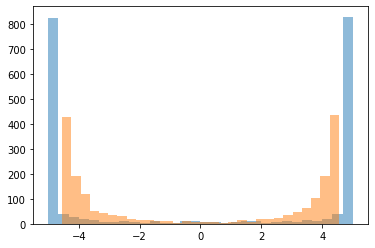

In [137]:
m = lambda x: nn.Tanh()(x) * 5
s = lambda x: nn.Softsign()(x) * 5
s2 = lambda x: x / (1 + x)
input = torch.Tensor(np.random.uniform(-10,10,2000))
output_m = m(input).numpy()
output_s = s(input).numpy()
output_s2 = s2(input).numpy()
plt.hist(output_m, bins=30, alpha=0.5);
plt.hist(output_s, bins=30, alpha=0.5);
#plt.hist(output_s2, bins=30, alpha=0.5);
plt.show()

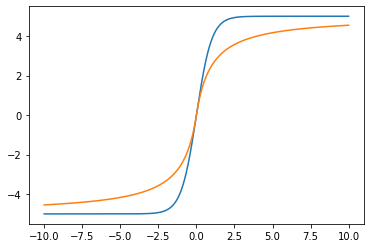

In [138]:
plt.plot(sorted(input),sorted(output_m))
plt.plot(sorted(input),sorted(output_s))
#plt.plot(sorted(input),sorted(output_s2))
plt.show()

calc_loss_input_datset(gg.dataset.dataset_list)

# Reconstruction error Degree Sequence vs. BCELoss

In [3]:
%matplotlib inline
from grid_automate import get_diff_deg_seq_vs_loss

base_path = Path("output_plots/autoencoder/81/")
#path = base_path / "ER__[01]_Classi1_nodi200_grafiX20___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000101_ADAMW_BCELoss"
#path = base_path / "ER__[01]_Classi1_nodi200_grafiX50___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000101_ADAMW_BCELoss"

#path = base_path / "ER__[005]_Classi1_nodi200_grafiX20___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal__UNnorm_adj_#__lr75000055e-05_ADAMW_BCELoss"

#config_class, diz_trials = get_diz_trials(path / "config.yml")
#trainer = Trainer(config_class, rootsave=Path(base_path))

In [5]:
training_folders = [x[0] if os.path.isdir(x[0]) else None for x in os.walk(base_path)][1:]
len(training_folders)

103

In [82]:
#training_folders

In [16]:
corresponding_loss_test, diff_deg_seq_test, corresponding_loss_train, diff_deg_seq_train, ref_loss = get_diff_deg_seq_vs_loss(path)

In [6]:
results = []
for i, folder in enumerate(training_folders):
    try:
        results.append(get_diff_deg_seq_vs_loss(base_path, Path(folder)))
    except FileNotFoundError as e:
        print(f"not found {i}")

not found 11


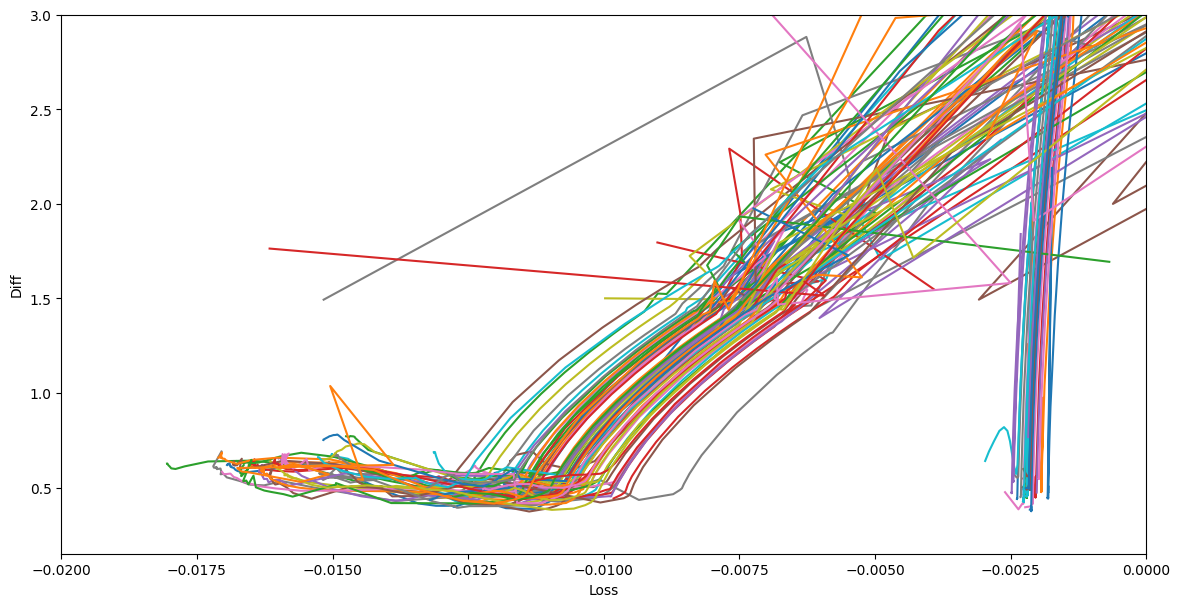

In [52]:
plt.figure()
for loss_test, diff_test, loss_train, diff_train, ref_loss in results:
    #plt.scatter(loss_test - ref_loss, diff_test, label='Test', marker='.')
    #plt.scatter(loss_train - ref_loss, diff_train, label='Train', marker='^')
    #print(len(loss_test + loss_train), len(diff_test + diff_train))
    x = loss_train - ref_loss #  loss_test #+  #
    y = np.array(diff_train) # np.array(diff_test)#+n
    if np.all(np.isfinite(x)) and np.all(np.isfinite(y)):
        #print(x, y, x.shape, y.shape)
        plt.plot(x, y)#, '.', markersize=1 )

plt.xlabel('Loss')
plt.ylabel('Diff')
#plt.legend()
plt.ylim(0.15,3)
plt.xlim(-0.02,0.0)
#plt.xlim(0.585,0.67)
plt.show()

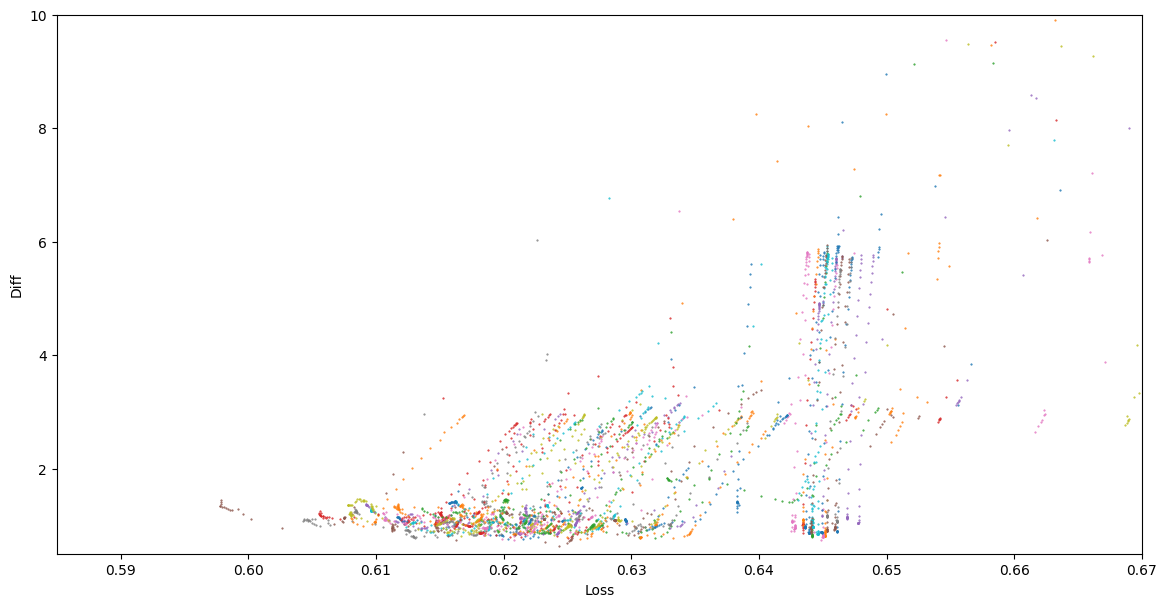

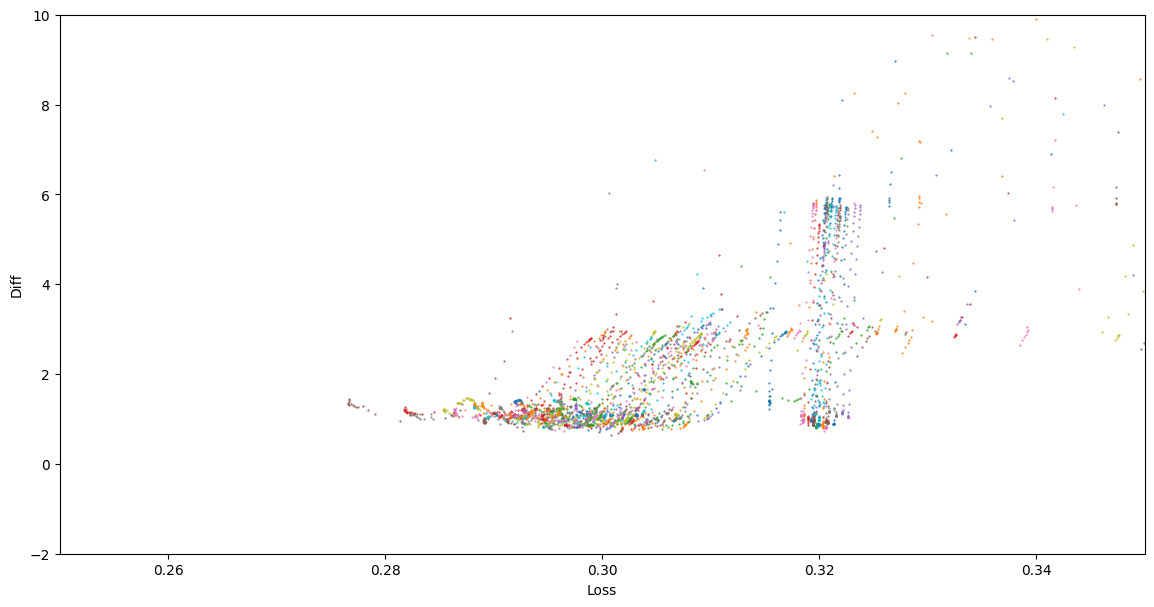

### visualizzo solo le diff test

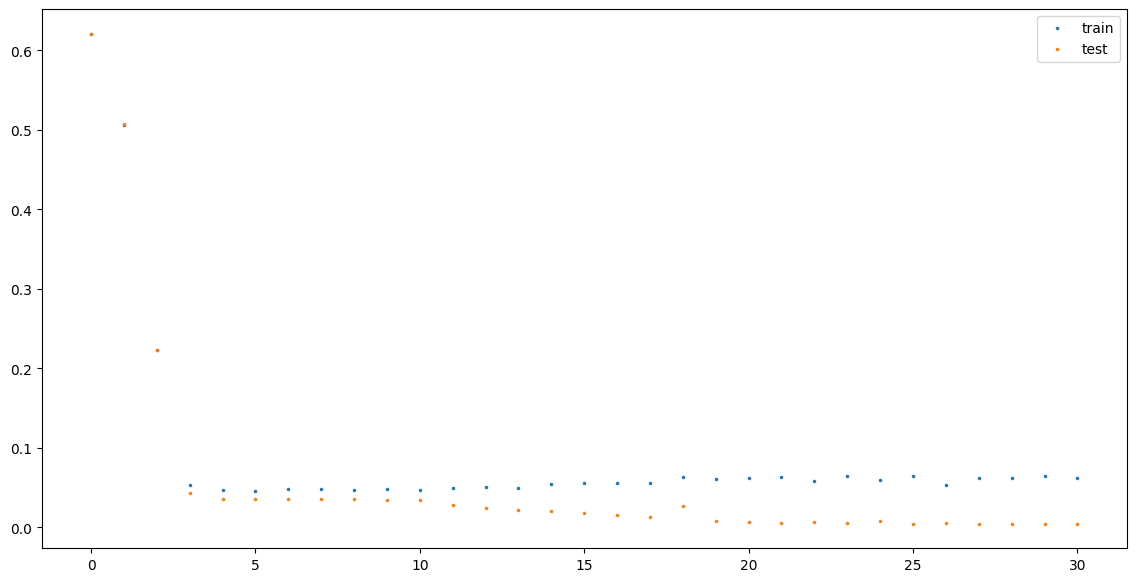

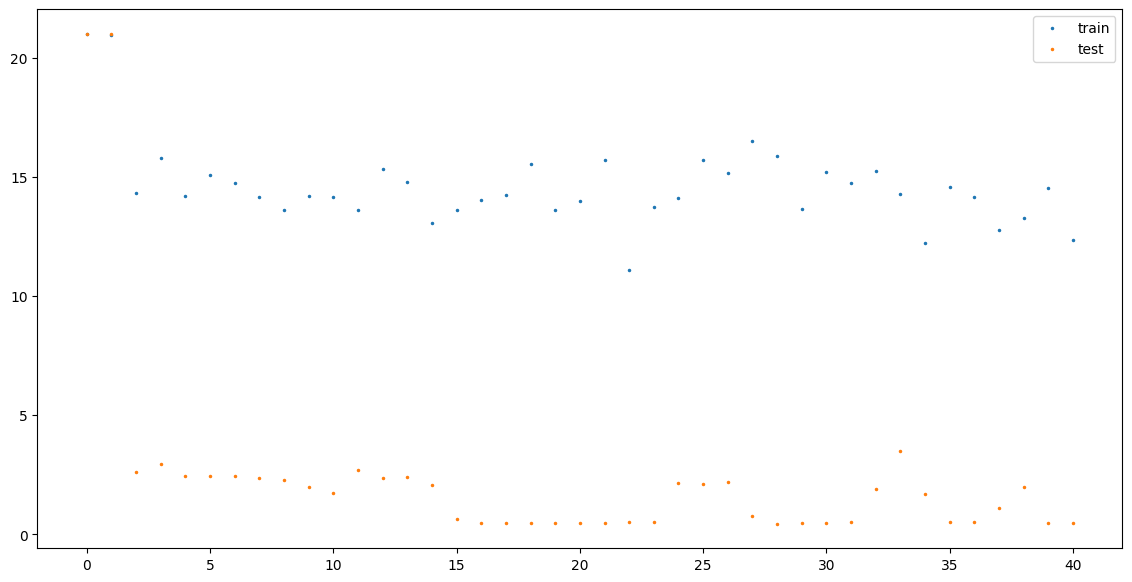

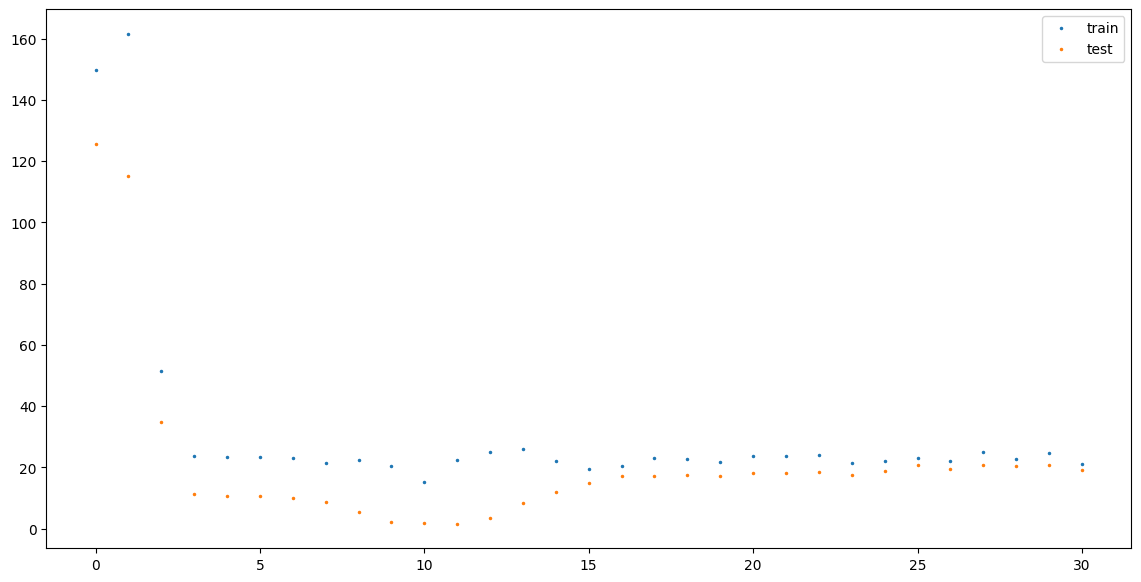

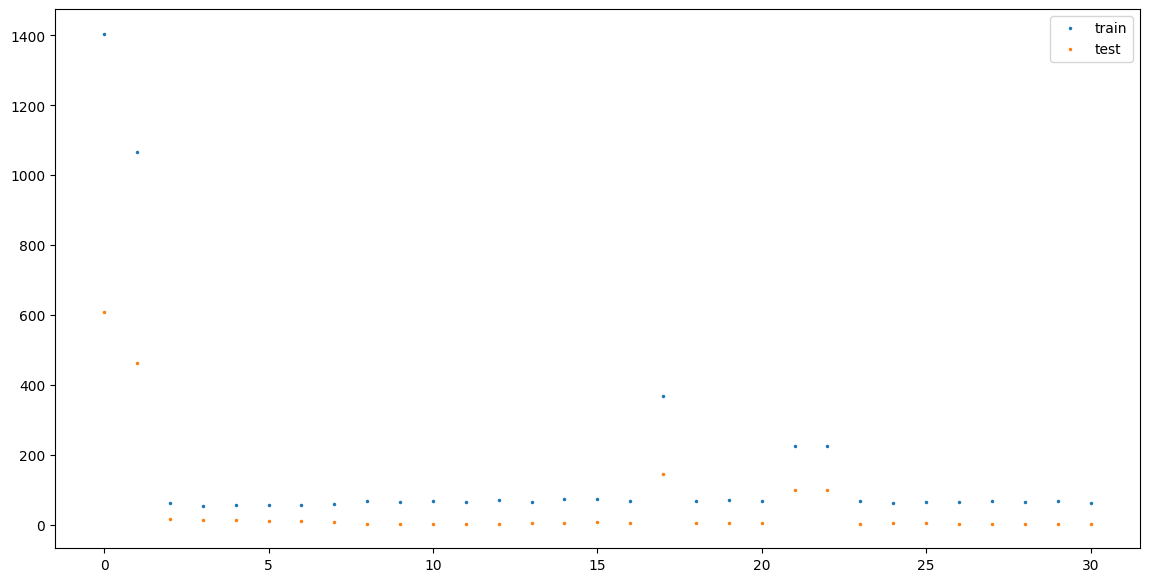

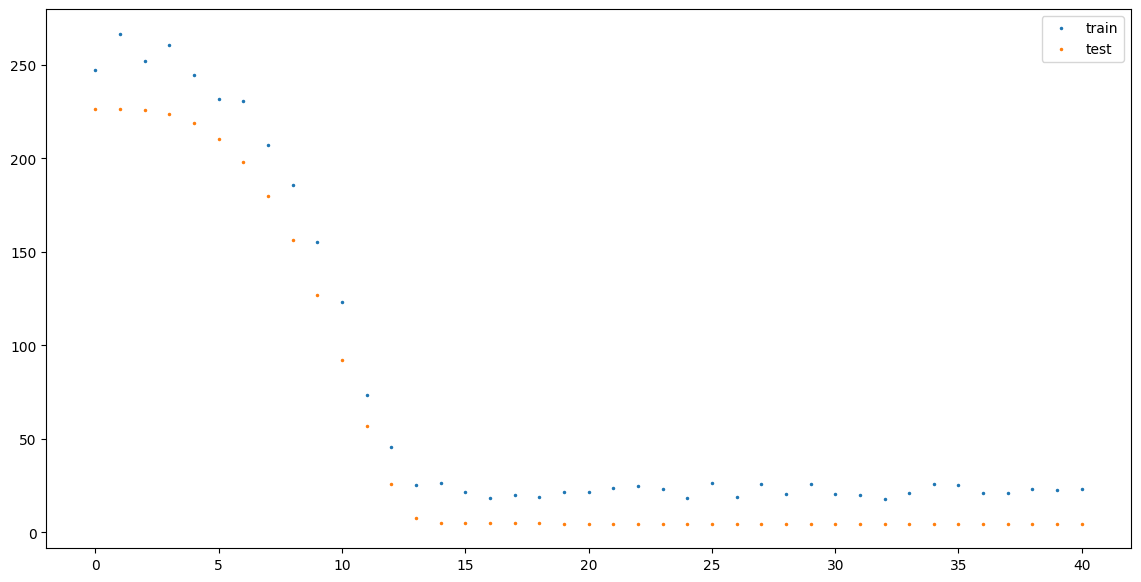

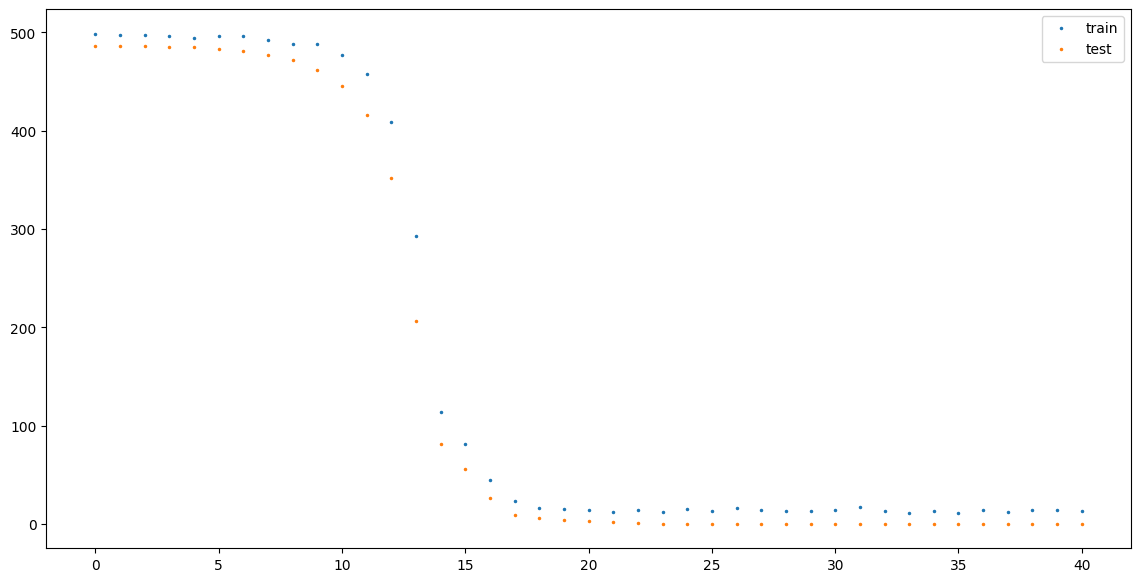

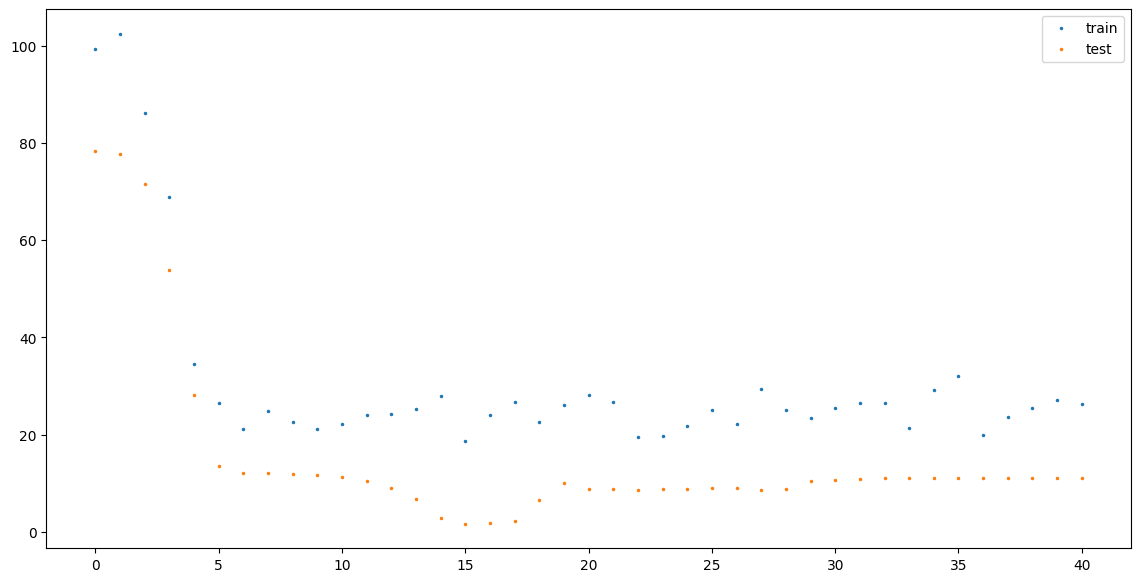

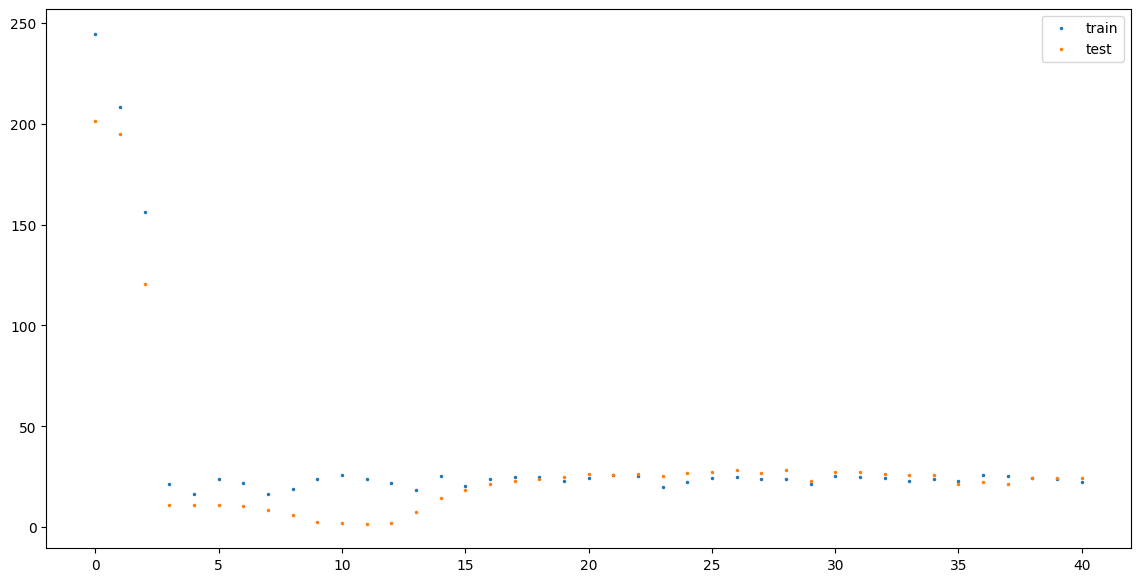

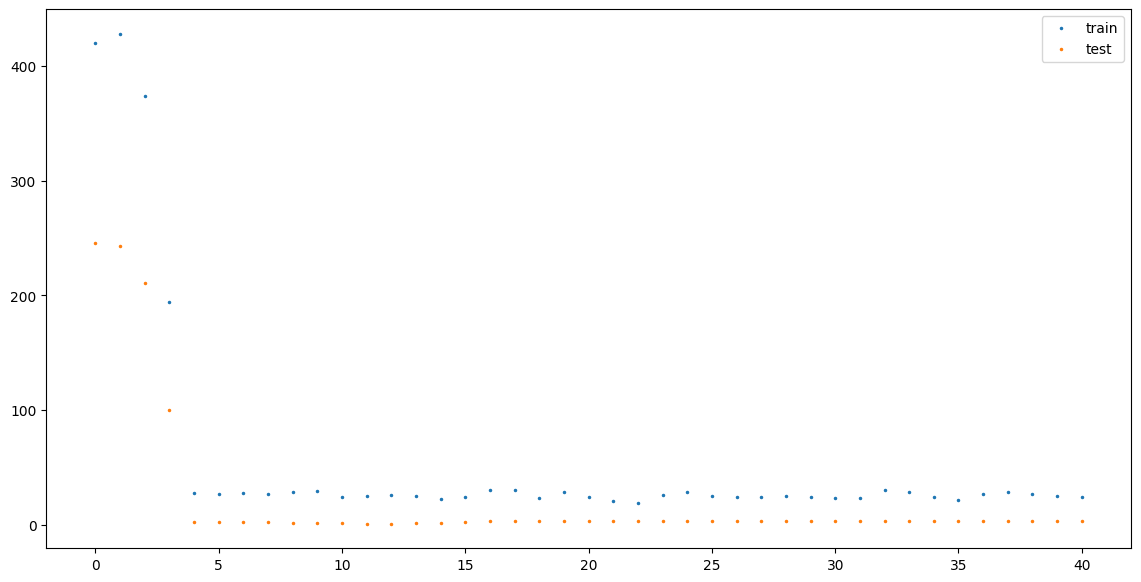

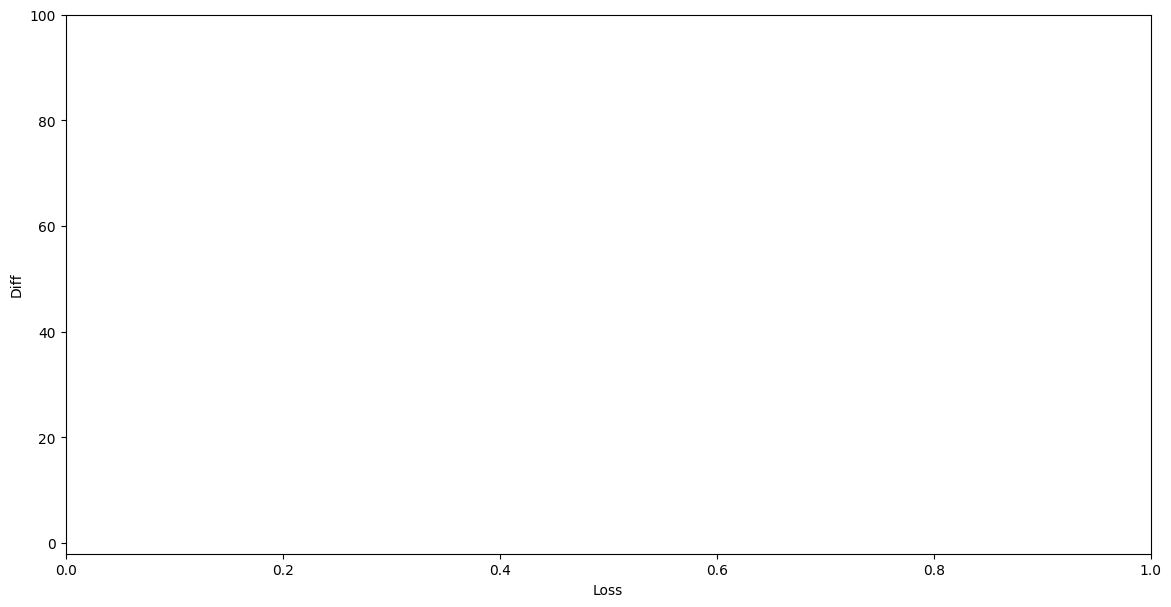

In [109]:
plt.figure()
for loss_test, diff_test, loss_train, diff_train, ref_loss in results:
    #plt.scatter(loss_test - ref_loss, diff_test, label='Test', marker='.')
    #plt.scatter(loss_train - ref_loss, diff_train, label='Train', marker='^')
    #print(len(loss_test + loss_train), len(diff_test + diff_train))
    x = loss_test + loss_train - ref_loss
    y = np.array(diff_test)+np.array(diff_train)
    if np.all(np.isfinite(x)) and np.all(np.isfinite(y)):
        plt.plot(diff_train, '.', markersize=3 , label='train')
        plt.plot(diff_test, '.', markersize=3, label='test' )
        plt.legend()
        plt.show()
    
plt.xlabel('Loss')
plt.ylabel('Diff')
#plt.legend()
plt.ylim(-2,100)
#plt.xlim(0.15,0.25)
plt.show()

In [92]:
path = base_path / "ER__[01]_Classi1_nodi50__grafiX10___#__AE_CM______§1-16-16-16-16-16§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000101_ADAMW_BCELoss"

corresponding_loss_test, diff_deg_seq_test, corresponding_loss_train, diff_deg_seq_train, ref_loss = get_diff_deg_seq_vs_loss(path)

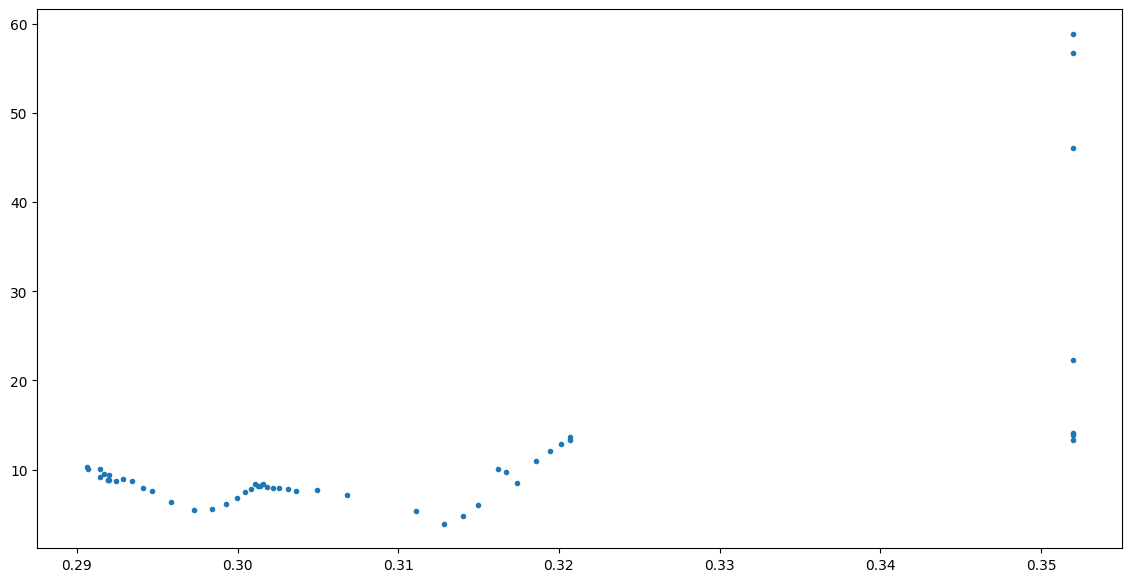

In [97]:
plt.plot(corresponding_loss_test, diff_deg_seq_test, '.')
#plt.plot(corresponding_loss_train)
#plt.plot(diff_deg_seq_test,'.')
#plt.plot(diff_deg_seq_train,'.')
#plt.ylim(17,40)

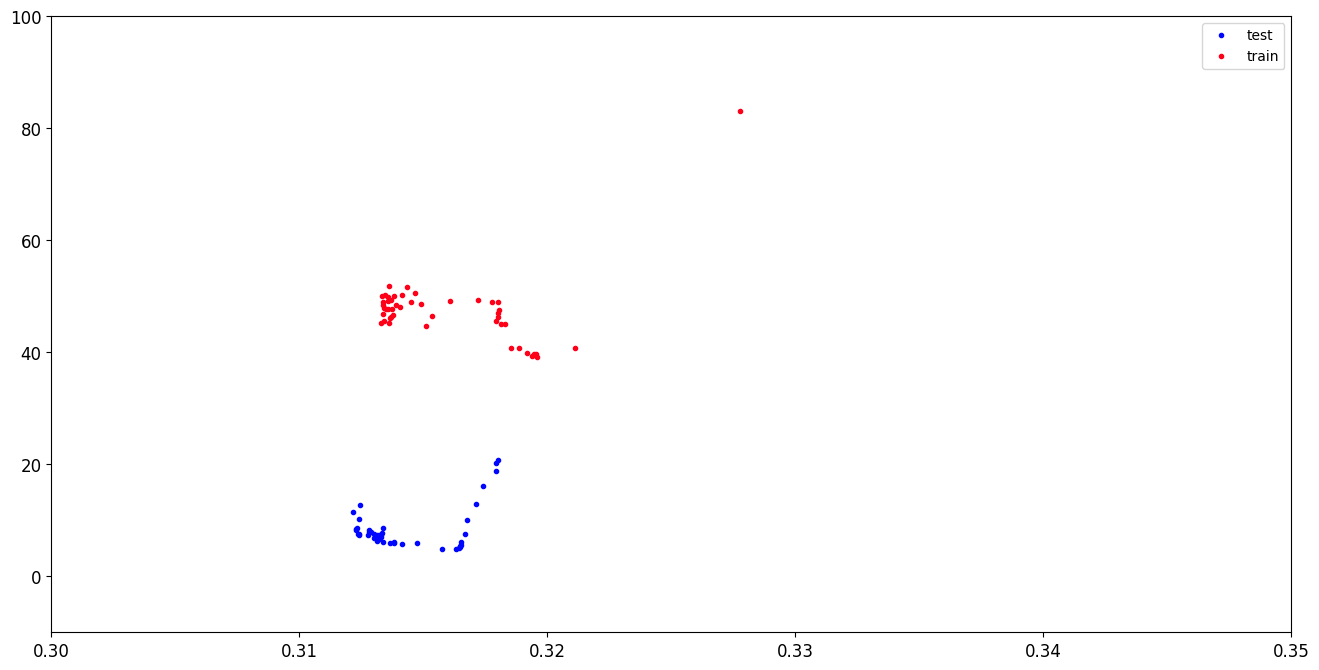

In [21]:
plt.plot(corresponding_loss_test, diff_deg_seq_test, '.', label='test')
plt.plot(corresponding_loss_train, diff_deg_seq_train, '.', label='train')
plt.ylim(-10,100)
plt.xlim(0.3,0.35)
plt.legend()
plt.show()

In [9]:
carichi = []
for fold in training_folders:
    try:
        corresponding_loss_test, diff_deg_seq_test, corresponding_loss_train, diff_deg_seq_train = get_diff_deg_seq_vs_loss(Path(fold))
        carichi.append(fold)
        #plt.plot(corresponding_loss, diff_deg_seq_test, '.', label='test')
        #plt.plot(corresponding_loss_train, diff_deg_seq_train, '.', label='train')
    except Exception as e:
        print(e)


[Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_Classi1_nodi500_grafiX20___#__AE_CM______§1-32-8§________ELU+RELU__grphnorm__-xavier_uniform__UNnorm_adj_#__lr000060056_ADAMW_BCELoss/config.yml'
[Errno 2] No such file or directory: 'output_plots/autoencoder/8/ER__[01]_Classi1_nodi300_grafiX20___#__AE_CM______§1-4-2§_________ELU+RELU__grphnorm__-eye__________#__lr0010001999999999999_ADAMW_BCELoss/config.yml'
'diff_deg_seq'
[Errno 2] No such file or directory: 'output_plots/autoencoder/8/ER__[05]_Classi1_nodi300_grafiX40___#__AE_________§1-8-8-8-8-4§___ELU+RELU__grphnorm__-xavier_normal___#__lr00001_ADAMW_BCELoss/config.yml'
'diff_deg_seq'
[Errno 2] No such file or directory: 'output_plots/autoencoder/8/CM__[-25]_Classi1_nodi300_grafiX20___#__AE_CM______§1-16-8§________ELU+RELU__grphnorm__-xavier_normal__my_norm_adj_#__lr000052_ADAMW_BCELoss/config.yml'
'diff_deg_seq'
[Errno 2] No such file or directory: 'output_plots/autoencoder/8/ER__[01]_Classi1_nodi201_grafi

In [54]:
print(len(carichi))
res_normalized = []
for fold in carichi:
    #corresponding_loss_test, diff_deg_seq_test, corresponding_loss_train, diff_deg_seq_train
    if 'UNnorm' not in fold:
        res_normalized.append(get_diff_deg_seq_vs_loss(Path(fold)))
        print(fold)

65
output_plots/autoencoder/8/ER__[01]_Classi1_nodi300_grafiX20___#__AE_CM______§1-16-16-8§_____ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/ER__[01]_Classi1_nodi300_grafiX20___#__AE_CM______§1-1§___________ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/CM__[-25]_Classi1_nodi300_grafiX20___#__AE_CM______§1-1§___________ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/CM__[-25]_Classi1_nodi300_grafiX20___#__AE_CM______§1-4-2§_________ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/CM__[-25]_Classi1_nodi300_grafiX20___#__AE_CM______§1-16-16-8§_____ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/ER__[01]_Classi1_nodi300_grafiX50___#__AE_CM______§1-16-16-8§_____ELU+RELU__grphnorm__-xavier_uniform___#__lr0000200005_ADAMW_BCELoss
output_plots/autoencoder/8/E

In [72]:
res_normalized_best = [res_normalized[0],  res_normalized[5]]  #res_normalized[4],

In [6]:
best_folder = [ 
    base_path / "ER__[01]_Classi1_nodi200_grafiX20___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000101_ADAMW_BCELoss",
    base_path / "ER__[01]_Classi1_nodi200_grafiX20___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000151_ADAMW_BCELoss",
    base_path / "ER__[01]_Classi1_nodi200_grafiX20___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000201_ADAMW_BCELoss",
    base_path / "ER__[01]_Classi1_nodi200_grafiX50___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000101_ADAMW_BCELoss",
    base_path / "ER__[01]_Classi1_nodi200_grafiX50___#__AE_CM______§1-128-64-64-32§__ELU+RELU__grphnorm__-xavier_normal___#__lr0000151_ADAMW_BCELoss",
]
best = []
for folder in best_folder:
    best.append(get_diff_deg_seq_vs_loss(Path(folder)))

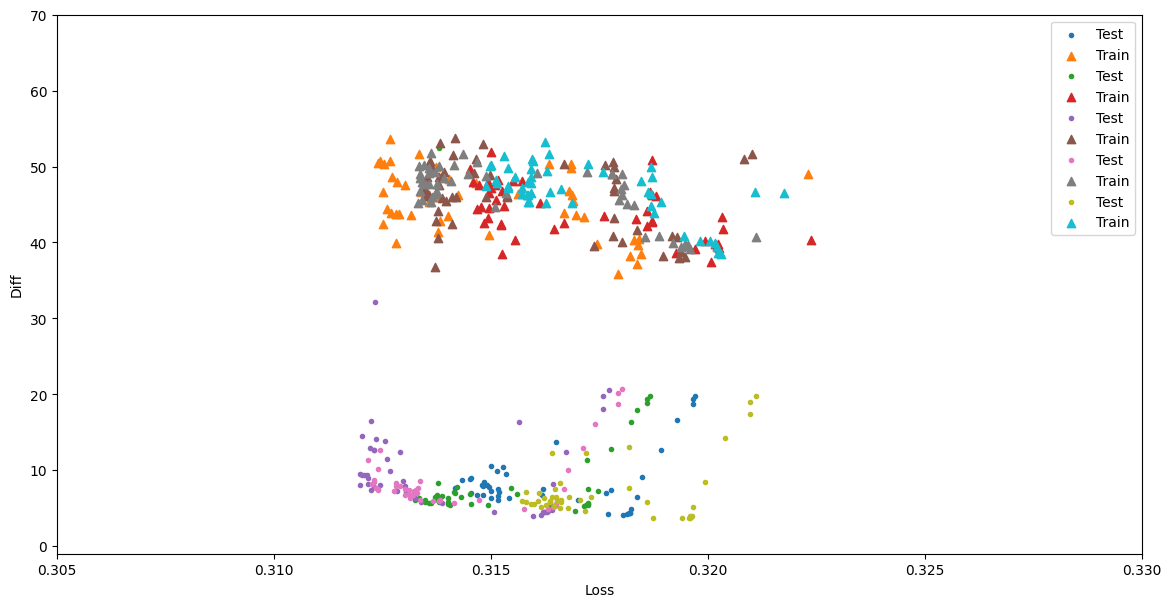

In [17]:
plt.figure()
for loss_test, diff_test, loss_train, diff_train in best:
    plt.scatter(loss_test, diff_test, label='Test', marker='.')
    plt.scatter(loss_train, diff_train, label='Train', marker='^')

plt.xlabel('Loss')
plt.ylabel('Diff')
plt.legend()
plt.ylim(-1,70)
plt.xlim(0.305,0.33)
plt.show()

In [1]:
epochs_list_points = 50
epochs = 100000
end3 = np.cbrt(epochs)
endlog = np.log(epochs)
cubicarray = np.power(np.linspace(1., end3, num=epochs_list_points), 3)
logarray = np.logspace(1., endlog, num=epochs_list_points, base=np.e)
epochs_list = np.unique(np.round(cubicarray)).astype(int)
epochs_log = np.unique(np.round(logarray)).astype(int)

plt.plot(epochs_list, '.')
plt.plot(epochs_log, '.')

NameError: name 'np' is not defined

# Show matrix normalization

In [3]:
from models import extended4test_myGCNencoder

In [10]:
c, diz_trials = get_diz_trials("configurations/Final1.yml")
modification_file = "trial_edits.yml"
edits = load_trials_edits(modification_file)
edits = None
path_to_save = Path("autoencoder/8")
print(f"Salvo plot in {rootsave / path_to_save} ")

if edits is not None:
    diz_trials = modify_some_trials(diz_trials, **edits)

xp = Experiments(diz_trials=diz_trials,
                 rootsave=rootsave / path_to_save, config_class=c,
                 reset_all_seeds=False, verbose=False)

primo config base da estendere con i trials validato.
Salvo plot in output_plots/autoencoder/8 
0 configurazioni saltate su 1, farò i seguenti 1 training: 
ER__[01]_Classi-1_nodi300_grafiX20___#__AE_CM______§1-16-8§________ELU+RELU__grphnorm__-xavier_normal__my_norm_adj_#__lr000052_ADAMW_BCELoss


In [12]:
c0 = xp.gc.configs[0]
xp.init_trainer(c0)
xp.trainer.init_dataset(parallel=True, verbose=False)
xp.trainer.load_dataset(xp.trainer.gg.dataset, parallel=False) 

BCELoss()
loss reduction: mean, -> is_weighted: False
Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.53it/s]


In [14]:
%matplotlib inline

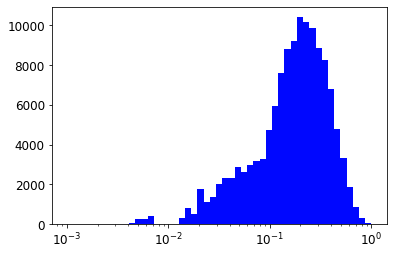

In [15]:
adj_norm = np.concatenate([d.edge_weight_normalized.cpu().numpy() for d in xp.trainer.dataset.train_dataset]).ravel()
adj_norm
plt.hist(adj_norm,  bins=np.logspace(np.log10(0.001),np.log10(1.0), 50))
plt.xscale('log')
plt.show()

In [4]:
14*300*299/2/2

313950.0

In [21]:
adj_norm.shape, adj_norm_0.shape

((130518,), (134400,))

In [16]:
xp0 = Experiments(diz_trials=None,
                 rootsave=rootsave / path_to_save, config_class=c,
                 reset_all_seeds=False, verbose=False)
xp0.init_trainer(c)
xp0.trainer.init_dataset(parallel=True, verbose=False)
xp0.trainer.load_dataset(xp0.trainer.gg.dataset, parallel=False) 
model = extended4test_myGCNencoder(c)
model.to(xp.trainer.device)

BCELoss()
loss reduction: mean, -> is_weighted: False
Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26.61it/s]


extended4test_myGCNencoder(
  (convs): ModuleList(
    (0): GCNConv(1, 32)
    (1): GCNConv(32, 32)
    (2): GCNConv(32, 32)
  )
  (act_func): ModuleList(
    (0): ELU(alpha=1.0)
    (1): ELU(alpha=1.0)
    (2): ELU(alpha=1.0)
  )
  (last_act_func): ReLU()
  (mean_pool): MeanAggregation()
)

In [17]:
model.eval()
loader = xp0.trainer.dataset.train_loader
num_nodes_batch = [len(data.x) for data in loader.dataset]
with torch.no_grad():
    for data in loader:
        edge_weights = model(data.x, data.edge_index)

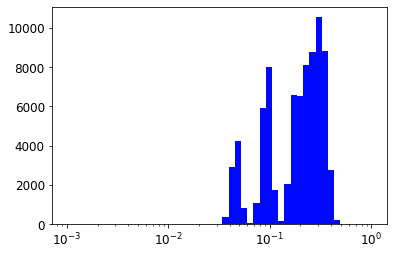

In [18]:

adj_norm_0 = np.concatenate([d.cpu().numpy() for d in edge_weights]).ravel()
plt.hist(adj_norm_0,  bins=np.logspace(np.log10(0.001),np.log10(1.0), 50))
plt.xscale('log')
plt.show()

# Ho tanti vettori random...come viene distribuito il loro prodotto scalare?

In [19]:
vets = np.random.uniform(-2, 2, (2000, 16))

In [20]:
np.matmul(vets[0], vets[1])

7.5193922134646485

In [21]:
np.dot(vets[0], vets[1])

7.5193922134646485

In [22]:
NN = vets.shape[0]
coppie_numeric = list(itertools.combinations(range(NN), 2))
coppie = vets[coppie_numeric]
res = [np.dot(a,b) for a,b in coppie]

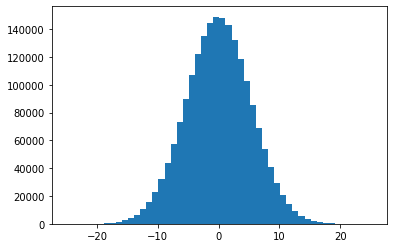

In [23]:
plt.hist(res, bins=50);

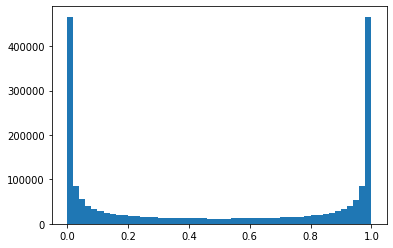

In [24]:
plt.hist((torch.nn.Sigmoid()(torch.Tensor(res))).numpy(), bins=50);

In [27]:
np.histogram(vets.ravel())

(array([3257, 3264, 3284, 3210, 3138, 3151, 3240, 3171, 3142, 3143]),
 array([-1.99992757e+00, -1.59997394e+00, -1.20002030e+00, -8.00066668e-01,
        -4.00113034e-01, -1.59400527e-04,  3.99794233e-01,  7.99747867e-01,
         1.19970150e+00,  1.59965513e+00,  1.99960877e+00]))

# provo la loss su tutto il batch delle matrici di adiacenza

In [28]:
import torch
import torch.nn as nn
loss = nn.MSELoss()
inputt = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(inputt, target)
#output.backward()

In [29]:
inputt

tensor([[ 3.9279e-01,  3.1012e-01, -3.7295e-01,  7.1200e-01, -7.1870e-01],
        [ 9.4544e-02, -3.8422e-01, -1.1881e+00,  7.6665e-02, -1.0704e+00],
        [-8.5436e-04,  8.2412e-01, -1.7195e+00,  1.1271e+00, -3.6185e-01]],
       requires_grad=True)

In [30]:
target

tensor([[-0.4612, -0.2620, -0.0043,  1.2438, -0.0349],
        [ 0.7463,  0.7026,  0.0903,  0.0795,  1.7249],
        [ 1.4315, -1.2536,  0.8943, -0.2123, -0.5038]])

In [31]:
output

tensor(1.8674, grad_fn=<MseLossBackward0>)

In [61]:
tensor1 = torch.randn(3).unsqueeze(1)
tensor2 = torch.randn(3).unsqueeze(1)
torch.matmul(tensor1, tensor2.t())#.size()

tensor([[-1.5172, -1.8515, -1.6216],
        [ 0.7826,  0.9550,  0.8364],
        [ 1.5000,  1.8305,  1.6032]])

In [51]:
tensor2

tensor([ 2.1523, -0.9108, -0.2973])

In [52]:
tensor2.unsqueeze(0)

tensor([[ 2.1523, -0.9108, -0.2973]])

In [59]:
tensor2.unsqueeze(1)

tensor([[ 2.1523],
        [-0.9108],
        [-0.2973]])

In [62]:
torch.randn(3).unsqueeze(1).size()

torch.Size([3, 1])

In [31]:
import torch

# Creiamo un batch di 3 grafi, ciascuno con 5 nodi
batch_size = 3
num_nodes = 4
emb_dim = 16

# Creiamo una matrice di embedding di dimensione [num_nodes, emb_dim] per ciascun grafo
emb1 = torch.randn(num_nodes, emb_dim)
emb2 = torch.randn(num_nodes, emb_dim)
emb3 = torch.randn(num_nodes, emb_dim)
emb =  torch.cat([emb1, emb2, emb3])
print(f"embedding shape: {emb.shape}")

# Creiamo una matrice di adiacenza per ciascun grafo utilizzando la funzione InnerProductDecoder
decoder = torch_geometric.nn.InnerProductDecoder()
out = torch.sigmoid(decoder.forward_all(emb))
print(f"out shape: {out.shape}\n {out}")

# Creiamo una variabile batch di dimensione [total_nodes] che assegna ciascun nodo al grafo di appartenenza
batch = torch.tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], dtype=torch.long)

# Creiamo la maschera per ogni grafo
mask = (batch.unsqueeze(1) == batch.unsqueeze(0)).to(torch.float)
print(f"mask shape: {mask.shape}\n {mask}")


embedding shape: torch.Size([12, 16])
out shape: torch.Size([12, 12])
 tensor([[0.7311, 0.7046, 0.6818, 0.5036, 0.5089, 0.7032, 0.7258, 0.5052, 0.5720,
         0.7169, 0.5688, 0.5047],
        [0.7046, 0.7311, 0.5290, 0.6799, 0.5140, 0.5863, 0.7224, 0.5060, 0.5774,
         0.6237, 0.7310, 0.5010],
        [0.6818, 0.5290, 0.7311, 0.5797, 0.6606, 0.5388, 0.5287, 0.5236, 0.7241,
         0.6797, 0.6213, 0.7302],
        [0.5036, 0.6799, 0.5797, 0.7311, 0.7273, 0.5115, 0.7013, 0.5030, 0.5083,
         0.5083, 0.7301, 0.7040],
        [0.5089, 0.5140, 0.6606, 0.7273, 0.7311, 0.5020, 0.5278, 0.7156, 0.5036,
         0.5377, 0.5360, 0.7306],
        [0.7032, 0.5863, 0.5388, 0.5115, 0.5020, 0.7311, 0.5397, 0.6110, 0.7303,
         0.7206, 0.6446, 0.5198],
        [0.7258, 0.7224, 0.5287, 0.7013, 0.5278, 0.5397, 0.7311, 0.5000, 0.5597,
         0.5276, 0.6966, 0.5021],
        [0.5052, 0.5060, 0.5236, 0.5030, 0.7156, 0.6110, 0.5000, 0.7311, 0.5240,
         0.6802, 0.5013, 0.6918],
        [

In [46]:
# Applichiamo la maschera ad ogni matrice di adiacenza utilizzando il prodotto tensoriale
adj = out * mask#.unsqueeze(2)
adj, adj.shape

(tensor([[0.7311, 0.5274, 0.7106, 0.7012, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.5274, 0.7310, 0.7041, 0.6238, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.7106, 0.7041, 0.7311, 0.5847, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.7012, 0.6238, 0.5847, 0.7311, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.7311, 0.7305, 0.5009, 0.5163, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.7305, 0.7311, 0.6608, 0.7310, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.5009, 0.6608, 0.7307, 0.7213, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.5163, 0.7310, 0.7213, 0.7311, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [30]:
#emb.shape, out.shape, batch.shape, mask.shape, mask.unsqueeze(2).shape, mask, adj.shape, adj
out.shape, mask.unsqueeze(2).shape, (out * mask.unsqueeze(2)).shape

(torch.Size([15, 15]), torch.Size([15, 15, 1]), torch.Size([15, 15, 15]))

In [39]:
x = torch.randn(5, 4, 3)
print(mask)
torch.diagonal(mask, offset=0, dim1=0, dim2=1)

tensor([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]])


tensor([1., 0., 0., 0., 1., 0., 0., 0., 1.])

In [48]:
m = torch.tensor([[1, 1], [1, 1]])
r = torch.block_diag(m,m,m,m)

In [49]:
r

tensor([[1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1]])

In [63]:
step = 2
db = torch.stack([r[i:i+step, i:i+step] for i in range(0, r.shape[0], step)])

In [65]:
db.shape

torch.Size([4, 2, 2])

-> è più veloce separare a monte le matrici e ciclarae la loss su tutte le matrici del batch


In [6]:
import torch
criterion_BCELoss_weighted = torch.nn.BCELoss()

In [7]:
getattr(criterion_BCELoss_weighted, "reduction")

'mean'